In [68]:
# Installing and importing all the required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import numpy as np
from pprint import pprint
import missingno as msno
import random

from sklearn.ensemble import IsolationForest
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
# Loading 'final_data.csv' file which has both Artists data and Genres data

data = pd.read_csv("final_data.csv")

In [6]:
# Displaying first five instances of the 'final_data.csv' file

data.head()

song_id       tempo  zero_crossings  \
0  Adam Levine_2XC5KXWV_0  161.499023           18664   
1  Adam Levine_2XC5KXWV_1  151.999081           26676   
2  Adam Levine_2XC5KXWV_2  112.347147           15884   
3  Adam Levine_2XC5KXWV_3  143.554688           19004   
4  Adam Levine_2XC5KXWV_4  107.666016           13345   

   spectral_bandwidth_mean  spectral_bandwidth_var  spectral_contrast_mean  \
0                 0.250031                0.106033                0.709966   
1                 0.601275                0.026921                0.421439   
2                 0.605087                0.013652                0.421186   
3                 0.646656                0.010908                0.418373   
4                 0.682170                0.011533                0.431722   

   spectral_contrast_var  spectral_centroids_mean  spectral_centroids_var  \
0               0.126503                 0.226523                0.093115   
1               0.039646                 0.355163                0.042216   
2               0.031573                 0.405395                0.026161   
3               0.030927                 0.441416                0.025839   
4               0.032315                 0.636830                0.031028   

   spectral_rolloff_mean  spectral_rolloff_var  spectral_flatness_mean  \
0               0.294194              0.145222                0.601582   
1               0.539744              0.034543                0.084628   
2               0.543826              0.032024                0.126987   
3               0.581601              0.030532                0.096976   
4               0.584636              0.021231                0.040646   

   spectral_flatness_var  chroma_stft1_mean  chroma_stft2_mean  \
0               0.235287           0.106727           0.055632   
1               0.031628           0.142215           0.117891   
2               0.045711           0.221410           0.181840   
3               0.029933           0.221207           0.177042   
4               0.008601           0.207805           0.182457   

   chroma_stft3_mean  chroma_stft4_mean  chroma_stft5_mean  chroma_stft6_mean  \
0           0.056829           0.041799           0.054273           0.076117   
1           0.168312           0.269239           0.280652           0.228933   
2           0.154472           0.213718           0.402687           0.400014   
3           0.261696           0.268648           0.301478           0.255355   
4           0.210466           0.236178           0.344093           0.291027   

   chroma_stft7_mean  chroma_stft8_mean  chroma_stft9_mean  \
0           0.110951           0.101199           0.113925   
1           0.245811           0.287904           0.354243   
2           0.292272           0.249663           0.186542   
3           0.342016           0.273452           0.173902   
4           0.240133           0.221938           0.140347   

   chroma_stft10_mean  chroma_stft11_mean  chroma_stft12_mean  \
0            0.156302            0.082302            0.105130   
1            0.316412            0.241638            0.267294   
2            0.177279            0.230952            0.262175   
3            0.184922            0.289482            0.384066   
4            0.133965            0.190000            0.313828   

   chroma_stft1_var  chroma_stft2_var  chroma_stft3_var  chroma_stft4_var  \
0          0.069012          0.023687          0.032547          0.024574   
1          0.040928          0.038206          0.065295          0.109969   
2          0.087980          0.074628          0.051013          0.071939   
3          0.075261          0.052949          0.101148          0.094212   
4          0.078850          0.064657          0.076672          0.072787   

   chroma_stft5_var  chroma_stft6_var  chroma_stft7_var  chroma_stft8_var  \
0          0.033265          0.053648          0.076736          0.057770   
1          0.108950          0.08

In [7]:
# Displaying the total count of instances and attributes present in the 'final_data.csv' file

data.shape

(22775, 127)

In [8]:
# Displaying the data type for each and every attribute in the 'final_data.csv' file

data.dtypes

song_id                     object
tempo                      float64
zero_crossings               int64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
spectral_contrast_mean     float64
spectral_contrast_var      float64
spectral_centroids_mean    float64
spectral_centroids_var     float64
spectral_rolloff_mean      float64
spectral_rolloff_var       float64
spectral_flatness_mean     float64
spectral_flatness_var      float64
chroma_stft1_mean          float64
chroma_stft2_mean          float64
chroma_stft3_mean          float64
chroma_stft4_mean          float64
chroma_stft5_mean          float64
chroma_stft6_mean          float64
chroma_stft7_mean          float64
chroma_stft8_mean          float64
chroma_stft9_mean          float64
chroma_stft10_mean         float64
chroma_stft11_mean         float64
chroma_stft12_mean         float64
chroma_stft1_var           float64
chroma_stft2_var           float64
chroma_stft3_var           float64
chroma_stft4_var    

In [9]:
# Applying .info() function to get the range and memory usage details

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22775 entries, 0 to 22774
Columns: 127 entries, song_id to target
dtypes: float64(123), int64(1), object(3)
memory usage: 22.1+ MB


In [10]:
# Displaying statistical description of the data with 5 point summary

data.describe()

tempo  zero_crossings  spectral_bandwidth_mean  \
count  22775.000000    22775.000000             22775.000000   
mean     125.931929    13895.126454                 0.659302   
std       21.746146     7754.808822                 0.130154   
min       25.087227        0.000000                 0.000000   
25%      112.347147     9044.000000                 0.598600   
50%      123.046875    12409.000000                 0.680306   
75%      135.999178    16793.000000                 0.746904   
max      287.109375    95105.000000                 0.964064   

       spectral_bandwidth_var  spectral_contrast_mean  spectral_contrast_var  \
count            22775.000000            22775.000000           22775.000000   
mean                 0.024080                0.489446               0.022954   
std                  0.025115                0.090789               0.010368   
min                  0.000000                0.000000               0.000000   
25%                  0.010639                0.433479               0.015362   
50%                  0.016406                0.493699               0.021121   
75%                  0.026708                0.549523               0.028483   
max                  0.222212                0.968582               0.137850   

       spectral_centroids_mean  spectral_centroids_var  spectral_rolloff_mean  \
count             22775.000000            22775.000000           22775.000000   
mean                  0.469626                0.028363               0.560467   
std                   0.129386                0.018005               0.143964   
min                   0.000000                0.000000               0.000000   
25%                   0.384940                0.017413               0.471934   
50%                   0.457851                0.024269               0.566290   
75%                   0.549390                0.033767               0.659291   
max                   0.922744                0.210146               0.973483   

       spectral_rolloff_var  spectral_flatness_mean  spectral_flatness_var  \
count          22775.000000            22775.000000           22775.000000   
mean               0.043551                0.132647               0.033433   
std                0.028070                0.117009               0.030523   
min                0.000000                0.004903               0.000000   
25%                0.024391                0.067749               0.018610   
50%                0.037645                0.104933               0.027027   
75%                0.055303                0.158468               0.037409   
max                0.228752                1.000000               0.247609   

       chroma_stft1_mean  chroma_stft2_mean  chroma_stft3_mean  \
count       22775.000000       22775.000000       22775.000000   
mean            0.297242           0.288567           0.301358   
std             0.148445           0.137803           0.144970   
min             0.000000           0.000000           0.000000   
25%             0.189780           0.187471           0.197465   
50%             0.277945           0.276006           0.287154   
75%             0.385055           0.375276           0.390943   
max             0.974765           0.999966           0.998254   

       chroma_stft4_mean  chroma_stft5_mean  chroma_stft6_mean  \
count       22775.000000       22775.000000       22775.000000   
mean            0.294983           0.306245           0.286495   
std             0.142225           0.153629           0.145116   
min             0.000000           0.000000           0.000000   
25%             0.190375           0.191999           0.178750   
50%             0.280353           0.288880           0.268301   
75%             0.384981           0.404401           0.378006   
max             0.999779           1.000000           0.992319   

       chroma_stft7_mean  chroma_stft8_mean  chroma_stft9_mean  \
count       22775.000000   

In [11]:
# Displaying the total number of instances count split on the basis of language variable

data['language'].value_counts()

English    10804
Hindi       6227
Telugu      5744
Name: language, dtype: int64

In [12]:
# Displaying the total number of instances count split on the basis of target variable

data['target'].value_counts().sort_index()

English_Adam Levine      1229
English_Drake            1580
English_HipHopParty      1017
English_Justin Bieber    1599
English_Rock             1188
English_Romantic          895
English_Selena Gomez     1471
English_The Weeknd        983
English_Workout           842
Hindi_arijit             1168
Hindi_atifaslam          1060
Hindi_rock                810
Hindi_romantic            842
Hindi_sonunigam          1326
Hindi_workout            1021
Telugu_anurag             468
Telugu_armaan             705
Telugu_geetha            1162
Telugu_rock               648
Telugu_romantic          1263
Telugu_sidsriram          365
Telugu_workout           1133
Name: target, dtype: int64

# Splitting of data into Artists and Genres datasets

In [21]:
# Code to split data into Artists and Genres datasets

artist_list = ['English_Adam Levine', 'English_Drake', 'English_Justin Bieber', 'English_Selena Gomez', 'English_The Weeknd',
               'Hindi_arijit', 'Hindi_atifaslam', 'Hindi_sonunigam',
               'Telugu_anurag', 'Telugu_armaan', 'Telugu_geetha', 'Telugu_sidsriram']

genre_list = ['English_HipHopParty', 'English_Rock', 'English_Romantic', 'English_Workout',
              'Hindi_rock', 'Hindi_romantic', 'Hindi_workout',
              'Telugu_rock', 'Telugu_romantic', 'Telugu_workout']

# data[data.target.isin(genre_list)]['target'].value_counts()

artist_data = data[data.target.isin(artist_list)]
genre_data  = data[data.target.isin(genre_list)]

artist_data.to_csv('Artist_Data.csv')
genre_data.to_csv('Genre_Data.csv')

# Artists Data

In [22]:
# Displaying first five instances of the artists data

artist_data.head()

song_id       tempo  zero_crossings  \
0  Adam Levine_2XC5KXWV_0  161.499023           18664   
1  Adam Levine_2XC5KXWV_1  151.999081           26676   
2  Adam Levine_2XC5KXWV_2  112.347147           15884   
3  Adam Levine_2XC5KXWV_3  143.554688           19004   
4  Adam Levine_2XC5KXWV_4  107.666016           13345   

   spectral_bandwidth_mean  spectral_bandwidth_var  spectral_contrast_mean  \
0                 0.250031                0.106033                0.709966   
1                 0.601275                0.026921                0.421439   
2                 0.605087                0.013652                0.421186   
3                 0.646656                0.010908                0.418373   
4                 0.682170                0.011533                0.431722   

   spectral_contrast_var  spectral_centroids_mean  spectral_centroids_var  \
0               0.126503                 0.226523                0.093115   
1               0.039646                 0.355163                0.042216   
2               0.031573                 0.405395                0.026161   
3               0.030927                 0.441416                0.025839   
4               0.032315                 0.636830                0.031028   

   spectral_rolloff_mean  spectral_rolloff_var  spectral_flatness_mean  \
0               0.294194              0.145222                0.601582   
1               0.539744              0.034543                0.084628   
2               0.543826              0.032024                0.126987   
3               0.581601              0.030532                0.096976   
4               0.584636              0.021231                0.040646   

   spectral_flatness_var  chroma_stft1_mean  chroma_stft2_mean  \
0               0.235287           0.106727           0.055632   
1               0.031628           0.142215           0.117891   
2               0.045711           0.221410           0.181840   
3               0.029933           0.221207           0.177042   
4               0.008601           0.207805           0.182457   

   chroma_stft3_mean  chroma_stft4_mean  chroma_stft5_mean  chroma_stft6_mean  \
0           0.056829           0.041799           0.054273           0.076117   
1           0.168312           0.269239           0.280652           0.228933   
2           0.154472           0.213718           0.402687           0.400014   
3           0.261696           0.268648           0.301478           0.255355   
4           0.210466           0.236178           0.344093           0.291027   

   chroma_stft7_mean  chroma_stft8_mean  chroma_stft9_mean  \
0           0.110951           0.101199           0.113925   
1           0.245811           0.287904           0.354243   
2           0.292272           0.249663           0.186542   
3           0.342016           0.273452           0.173902   
4           0.240133           0.221938           0.140347   

   chroma_stft10_mean  chroma_stft11_mean  chroma_stft12_mean  \
0            0.156302            0.082302            0.105130   
1            0.316412            0.241638            0.267294   
2            0.177279            0.230952            0.262175   
3            0.184922            0.289482            0.384066   
4            0.133965            0.190000            0.313828   

   chroma_stft1_var  chroma_stft2_var  chroma_stft3_var  chroma_stft4_var  \
0          0.069012          0.023687          0.032547          0.024574   
1          0.040928          0.038206          0.065295          0.109969   
2          0.087980          0.074628          0.051013          0.071939   
3          0.075261          0.052949          0.101148          0.094212   
4          0.078850          0.064657          0.076672          0.072787   

   chroma_stft5_var  chroma_stft6_var  chroma_stft7_var  chroma_stft8_var  \
0          0.033265          0.053648          0.076736          0.057770   
1          0.108950          0.08

In [24]:
# Displaying the total count of instances and attributes present in the artists data

artist_data.shape

(13116, 127)

In [26]:
# Displaying the data type for each and every attribute in the artists data

artist_data.dtypes

song_id                     object
tempo                      float64
zero_crossings               int64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
spectral_contrast_mean     float64
spectral_contrast_var      float64
spectral_centroids_mean    float64
spectral_centroids_var     float64
spectral_rolloff_mean      float64
spectral_rolloff_var       float64
spectral_flatness_mean     float64
spectral_flatness_var      float64
chroma_stft1_mean          float64
chroma_stft2_mean          float64
chroma_stft3_mean          float64
chroma_stft4_mean          float64
chroma_stft5_mean          float64
chroma_stft6_mean          float64
chroma_stft7_mean          float64
chroma_stft8_mean          float64
chroma_stft9_mean          float64
chroma_stft10_mean         float64
chroma_stft11_mean         float64
chroma_stft12_mean         float64
chroma_stft1_var           float64
chroma_stft2_var           float64
chroma_stft3_var           float64
chroma_stft4_var    

In [27]:
# Applying .info() function to get the range and memory usage details

artist_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13116 entries, 0 to 13115
Columns: 127 entries, song_id to target
dtypes: float64(123), int64(1), object(3)
memory usage: 12.8+ MB


In [28]:
# Displaying statistical description of the data with 5 point summary

artist_data.describe()

tempo  zero_crossings  spectral_bandwidth_mean  \
count  13116.000000    13116.000000             13116.000000   
mean     127.308747    16638.969960                 0.620431   
std       20.777953     8692.013905                 0.137963   
min       25.087227        0.000000                 0.000000   
25%      112.347147    11498.750000                 0.555120   
50%      123.046875    15145.500000                 0.645329   
75%      135.999178    19544.250000                 0.716324   
max      287.109375    95105.000000                 0.918400   

       spectral_bandwidth_var  spectral_contrast_mean  spectral_contrast_var  \
count            13116.000000            13116.000000           13116.000000   
mean                 0.031018                0.470030               0.028186   
std                  0.029636                0.099973               0.010306   
min                  0.000000                0.000000               0.000000   
25%                  0.014132                0.408517               0.021893   
50%                  0.021118                0.469400               0.026920   
75%                  0.034410                0.532753               0.032637   
max                  0.222212                0.968582               0.137850   

       spectral_centroids_mean  spectral_centroids_var  spectral_rolloff_mean  \
count             13116.000000            13116.000000           13116.000000   
mean                  0.433973                0.032763               0.548489   
std                   0.118503                0.020403               0.154847   
min                   0.000000                0.000000               0.000000   
25%                   0.364207                0.020327               0.450977   
50%                   0.429668                0.027811               0.555099   
75%                   0.500959                0.038387               0.655514   
max                   0.922686                0.210146               0.973483   

       spectral_rolloff_var  spectral_flatness_mean  spectral_flatness_var  \
count          13116.000000            13116.000000           13116.000000   
mean               0.051522                0.118086               0.035486   
std                0.030728                0.136031               0.037848   
min                0.000000                0.004903               0.000000   
25%                0.030929                0.055842               0.017067   
50%                0.044902                0.085678               0.025591   
75%                0.064055                0.126478               0.037058   
max                0.228752                1.000000               0.247609   

       chroma_stft1_mean  chroma_stft2_mean  chroma_stft3_mean  \
count       13116.000000       13116.000000       13116.000000   
mean            0.241964           0.239249           0.249454   
std             0.123370           0.121155           0.126634   
min             0.000000           0.000000           0.000000   
25%             0.155778           0.152670           0.159970   
50%             0.226432           0.225583           0.234681   
75%             0.311076           0.311209           0.321532   
max             0.937142           0.892584           0.996301   

       chroma_stft4_mean  chroma_stft5_mean  chroma_stft6_mean  \
count       13116.000000       13116.000000       13116.000000   
mean            0.246570           0.246903           0.232590   
std             0.127836           0.129263           0.123567   
min             0.000000           0.000000           0.000000   
25%             0.154701           0.152764           0.143948   
50%             0.230246           0.228877           0.214833   
75%             0.319162           0.320950           0.302058   
max             0.931741           0.986430           0.971206   

       chroma_stft7_mean  chroma_stft8_mean  chroma_stft9_mean  \
count       13116.000000   

In [29]:
# Displaying the total number of instances count split on the basis of language variable for artists data

artist_data['language'].value_counts()

English    6862
Hindi      3554
Telugu     2700
Name: language, dtype: int64

In [30]:
# Displaying the total number of instances count split on the basis of target variable for artists data

artist_data['target'].value_counts().sort_index()

English_Adam Levine      1229
English_Drake            1580
English_Justin Bieber    1599
English_Selena Gomez     1471
English_The Weeknd        983
Hindi_arijit             1168
Hindi_atifaslam          1060
Hindi_sonunigam          1326
Telugu_anurag             468
Telugu_armaan             705
Telugu_geetha            1162
Telugu_sidsriram          365
Name: target, dtype: int64

In [34]:
# To display the unique values present in each feature of the artist data

artist_data.nunique()

song_id                    13105
tempo                         48
zero_crossings              9872
spectral_bandwidth_mean    13080
spectral_bandwidth_var     13080
spectral_contrast_mean     13080
spectral_contrast_var      13080
spectral_centroids_mean    13080
spectral_centroids_var     13080
spectral_rolloff_mean      13073
spectral_rolloff_var       13080
spectral_flatness_mean     13076
spectral_flatness_var      13075
chroma_stft1_mean          13076
chroma_stft2_mean          13075
chroma_stft3_mean          13078
chroma_stft4_mean          13076
chroma_stft5_mean          13075
chroma_stft6_mean          13077
chroma_stft7_mean          13076
chroma_stft8_mean          13076
chroma_stft9_mean          13075
chroma_stft10_mean         13069
chroma_stft11_mean         13078
chroma_stft12_mean         13073
chroma_stft1_var           13077
chroma_stft2_var           13079
chroma_stft3_var           13073
chroma_stft4_var           13075
chroma_stft5_var           13075
chroma_stf

In [35]:
# To display the total number of null values present against each attribute in the artist data
artist_data.apply(lambda x: sum(x.isnull()),axis=0)

song_id                    0
tempo                      0
zero_crossings             0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
spectral_contrast_mean     0
spectral_contrast_var      0
spectral_centroids_mean    0
spectral_centroids_var     0
spectral_rolloff_mean      0
spectral_rolloff_var       0
spectral_flatness_mean     0
spectral_flatness_var      0
chroma_stft1_mean          0
chroma_stft2_mean          0
chroma_stft3_mean          0
chroma_stft4_mean          0
chroma_stft5_mean          0
chroma_stft6_mean          0
chroma_stft7_mean          0
chroma_stft8_mean          0
chroma_stft9_mean          0
chroma_stft10_mean         0
chroma_stft11_mean         0
chroma_stft12_mean         0
chroma_stft1_var           0
chroma_stft2_var           0
chroma_stft3_var           0
chroma_stft4_var           0
chroma_stft5_var           0
chroma_stft6_var           0
chroma_stft7_var           0
chroma_stft8_var           0
chroma_stft9_var           0
chroma_stft10_

<Figure size 1080x576 with 0 Axes>

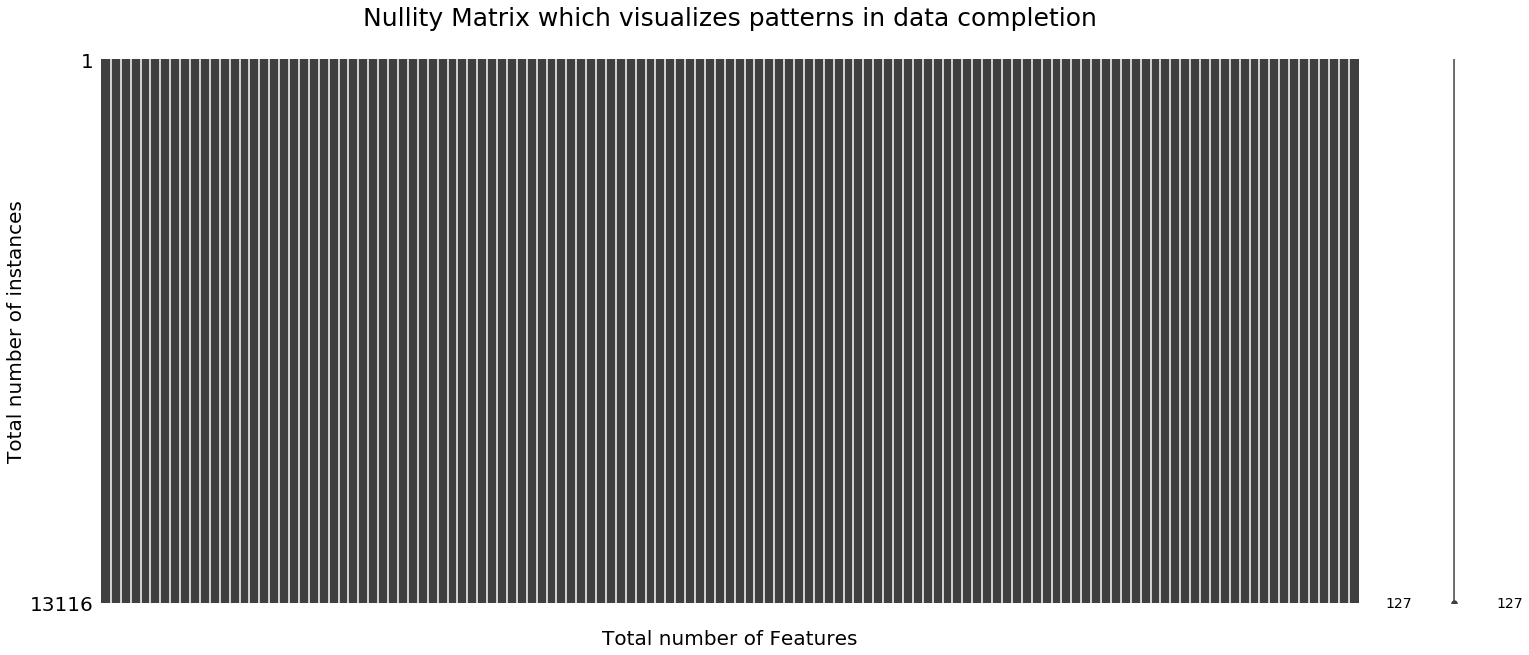

In [36]:
# Plotting the presence of null values using the missingno package

plt.figure(figsize=(15,8))
msno.matrix(artist_data)
plt.title("Nullity Matrix which visualizes patterns in data completion\n",size = 25)
plt.xlabel("\nTotal number of Features",size = 20)
plt.ylabel("Total number of instances",size = 20)
plt.show()

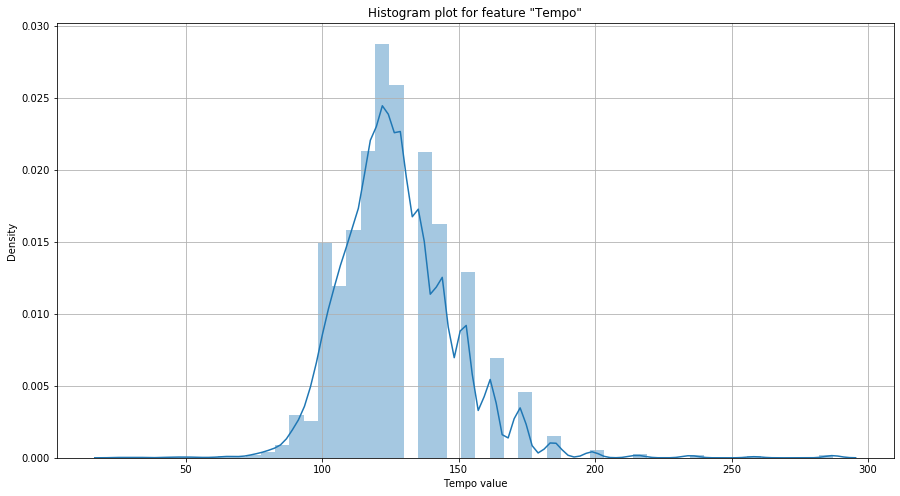

In [37]:
# Graphical univariate analysis on different features of the data

plt.figure(figsize=(15,8))
sns.distplot(artist_data['tempo'])
plt.grid()
plt.xlabel('Tempo value')
plt.ylabel('Density')
# plt.title('Histogram plot of tempo for all the English artists')
plt.title('Histogram plot for feature "Tempo"')
plt.show()

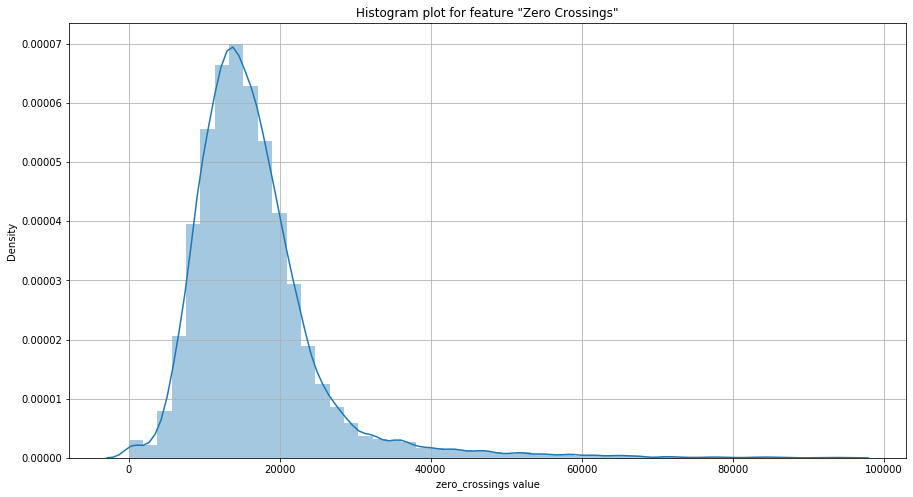

In [38]:
plt.figure(figsize=(15,8))
sns.distplot(artist_data['zero_crossings'])
plt.grid()
plt.xlabel('zero_crossings value')
plt.ylabel('Density')
plt.title('Histogram plot for feature "Zero Crossings"')
plt.show()

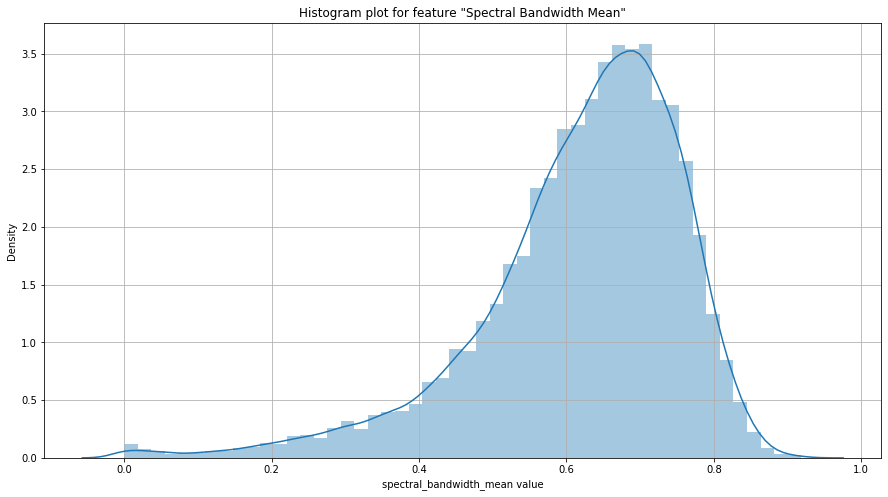

In [39]:
plt.figure(figsize=(15,8))
sns.distplot(artist_data['spectral_bandwidth_mean'])
plt.grid()
plt.xlabel('spectral_bandwidth_mean value')
plt.ylabel('Density')
plt.title('Histogram plot for feature "Spectral Bandwidth Mean"')
plt.show()

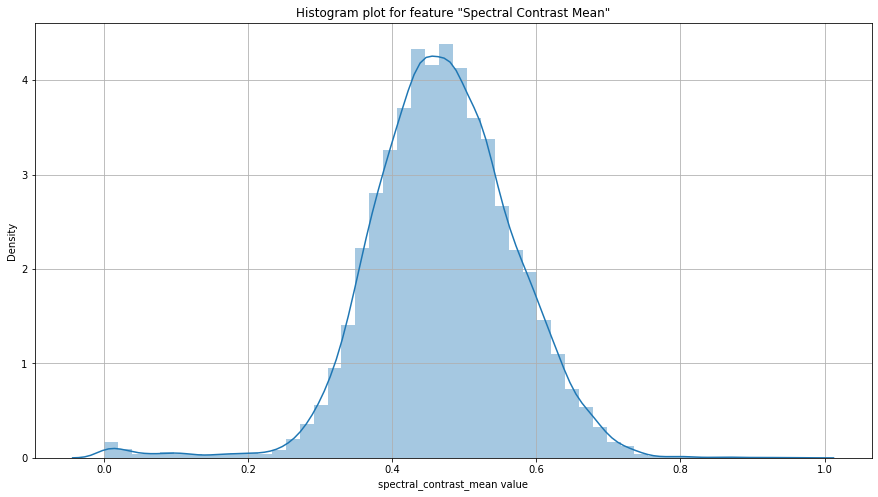

In [40]:
plt.figure(figsize=(15,8))
sns.distplot(artist_data['spectral_contrast_mean'])
plt.grid()
plt.xlabel('spectral_contrast_mean value')
plt.ylabel('Density')
plt.title('Histogram plot for feature "Spectral Contrast Mean"')
plt.show()

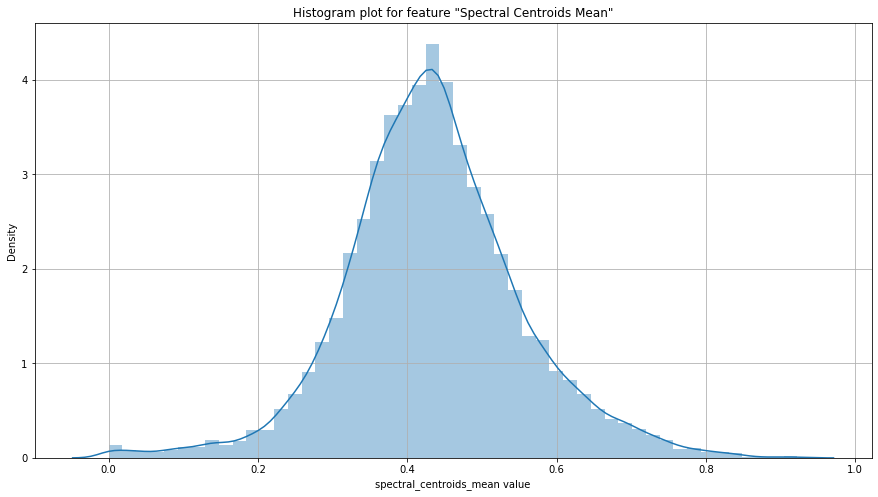

In [41]:
plt.figure(figsize=(15,8))
sns.distplot(artist_data['spectral_centroids_mean'])
plt.grid()
plt.xlabel('spectral_centroids_mean value')
plt.ylabel('Density')
plt.title('Histogram plot for feature "Spectral Centroids Mean"')
plt.show()

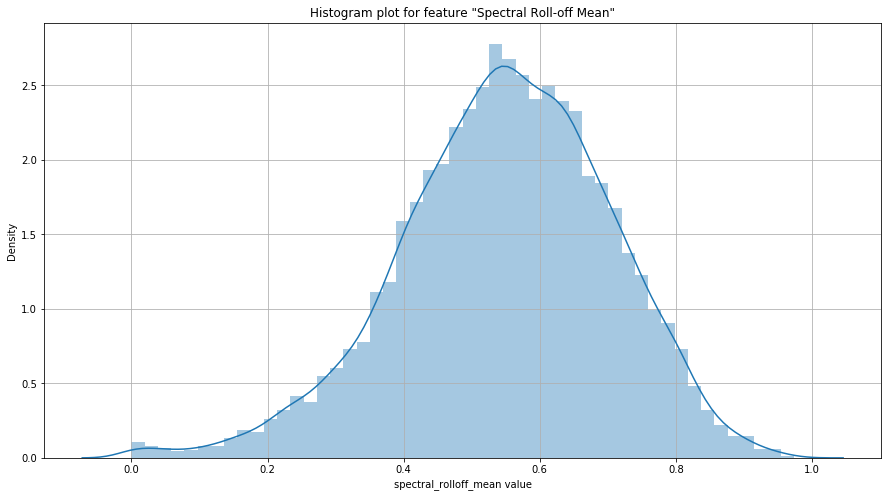

In [42]:
plt.figure(figsize=(15,8))
sns.distplot(artist_data['spectral_rolloff_mean'])
plt.grid()
plt.xlabel('spectral_rolloff_mean value')
plt.ylabel('Density')
plt.title('Histogram plot for feature "Spectral Roll-off Mean"')
plt.show()

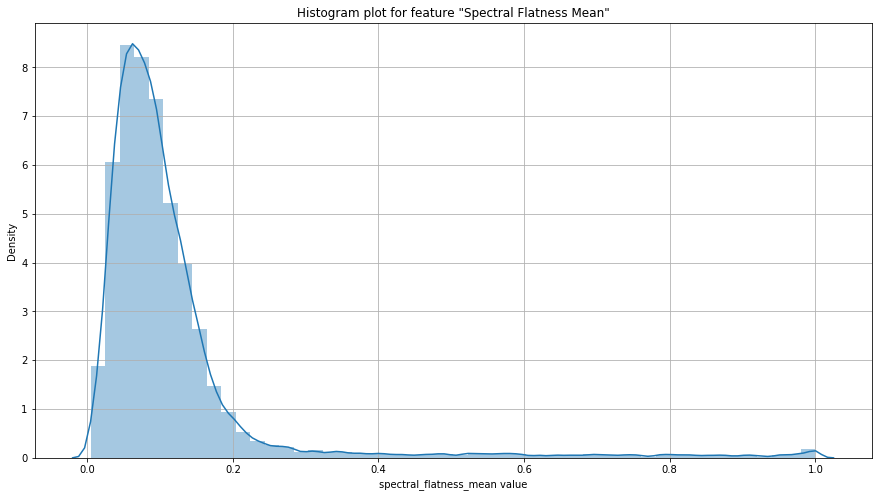

In [43]:
plt.figure(figsize=(15,8))
sns.distplot(artist_data['spectral_flatness_mean'])
plt.grid()
plt.xlabel('spectral_flatness_mean value')
plt.ylabel('Density')
plt.title('Histogram plot for feature "Spectral Flatness Mean"')
plt.show()

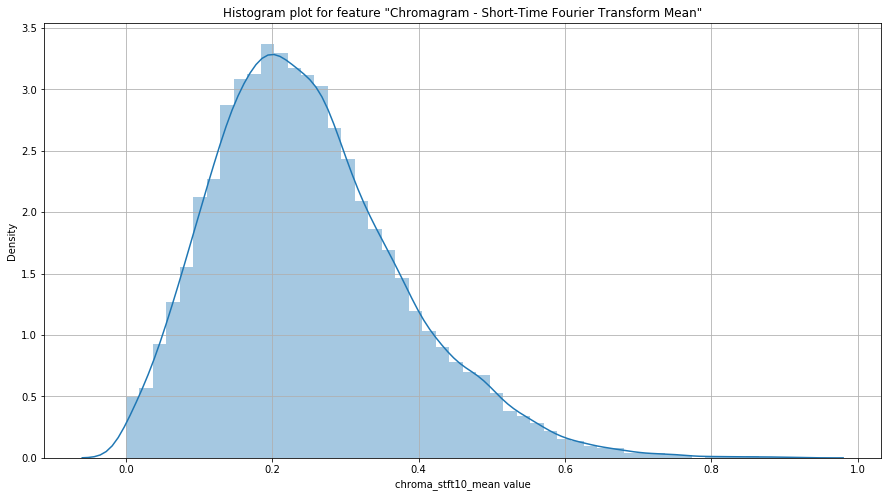

In [44]:
plt.figure(figsize=(15,8))
sns.distplot(artist_data['chroma_stft10_mean'])
plt.grid()
plt.xlabel('chroma_stft10_mean value')
plt.ylabel('Density')
plt.title('Histogram plot for feature "Chromagram - Short-Time Fourier Transform Mean"')
plt.show()

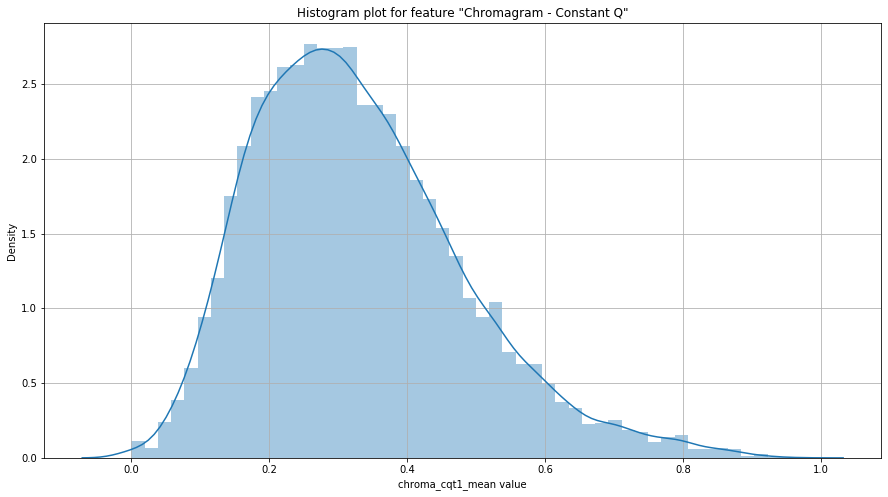

In [45]:
plt.figure(figsize=(15,8))
sns.distplot(artist_data['chroma_cqt1_mean'])
plt.grid()
plt.xlabel('chroma_cqt1_mean value')
plt.ylabel('Density')
plt.title('Histogram plot for feature "Chromagram - Constant Q"')
plt.show()

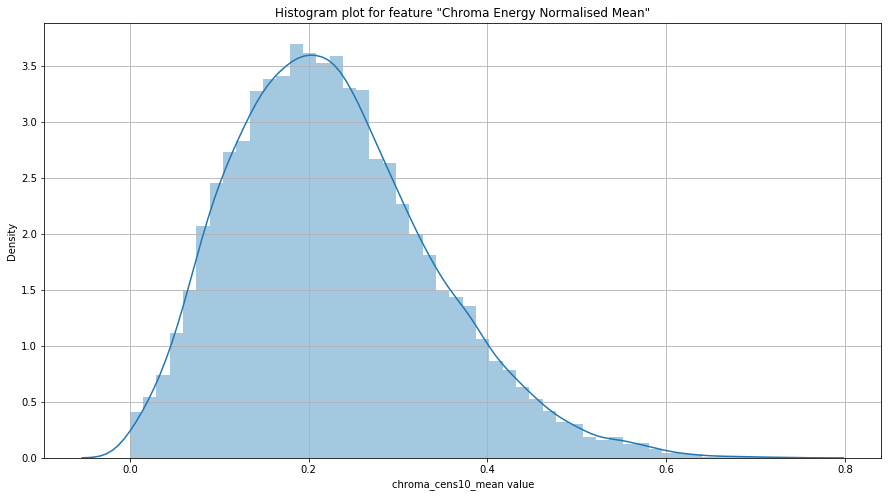

In [46]:
plt.figure(figsize=(15,8))
sns.distplot(artist_data['chroma_cens10_mean'])
plt.grid()
plt.xlabel('chroma_cens10_mean value')
plt.ylabel('Density')
plt.title('Histogram plot for feature "Chroma Energy Normalised Mean"')
plt.show()

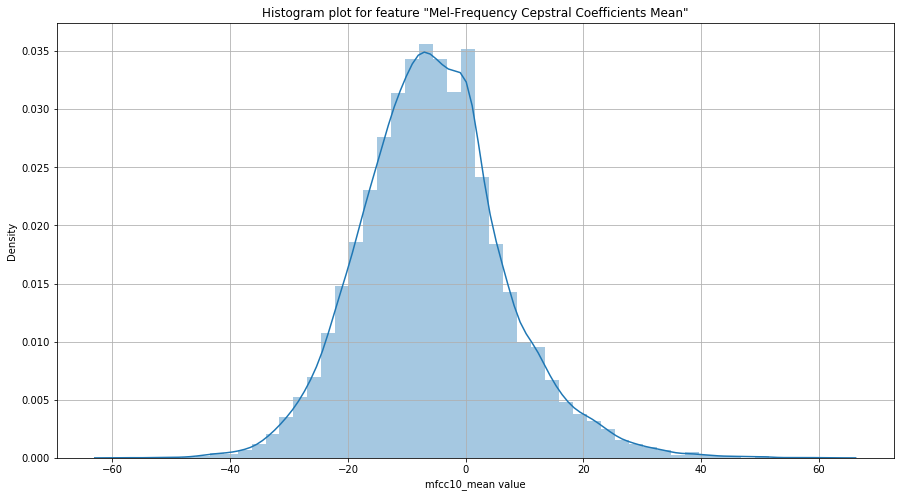

In [47]:
plt.figure(figsize=(15,8))
sns.distplot(artist_data['mfcc10_mean'])
plt.grid()
plt.xlabel('mfcc10_mean value')
plt.ylabel('Density')
plt.title('Histogram plot for feature "Mel-Frequency Cepstral Coefficients Mean"')
plt.show()

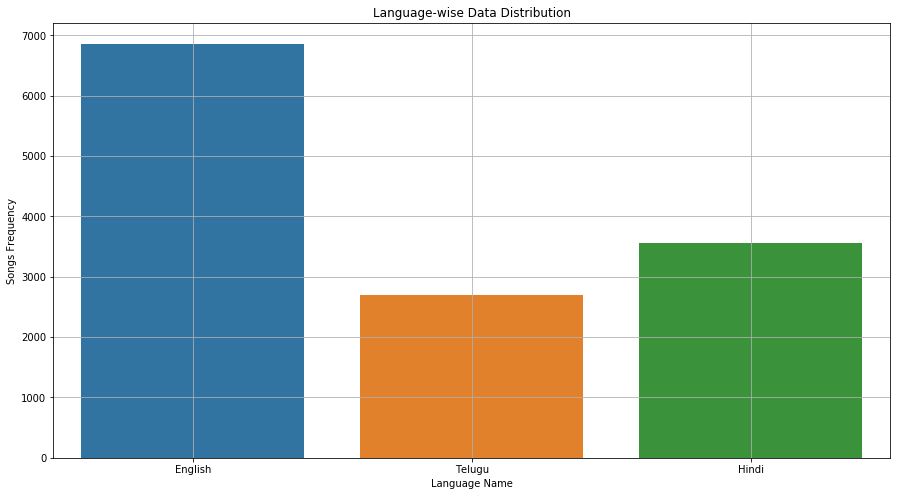

In [48]:
plt.figure(figsize=(15,8))
sns.countplot(artist_data['language'])
plt.grid()
plt.xlabel('Language Name')
plt.ylabel('Songs Frequency')
plt.title('Language-wise Data Distribution')
plt.show()

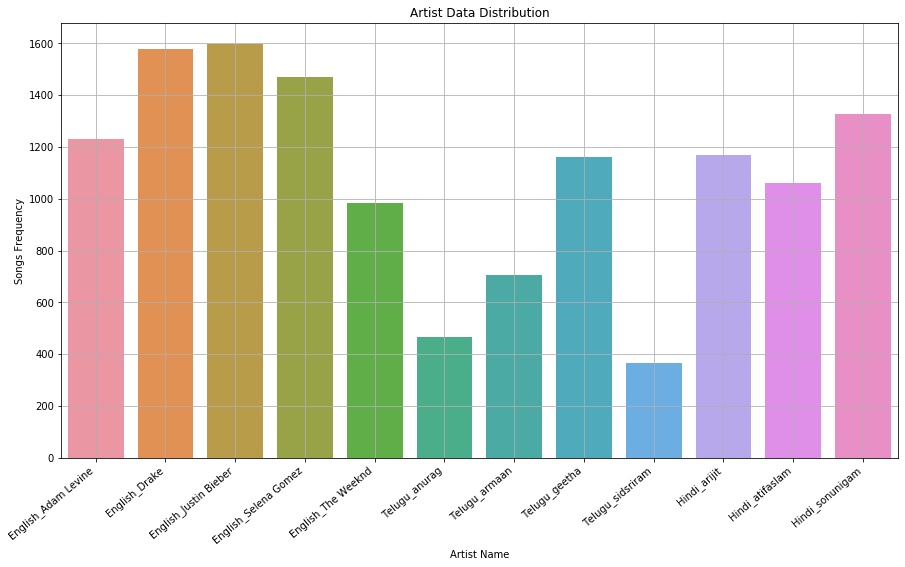

In [49]:
plt.figure(figsize=(15,8))
sns.countplot(artist_data['target'])
plt.grid()
plt.xticks(rotation=40, ha='right')
plt.xlabel('Artist Name')
plt.ylabel('Songs Frequency')
plt.title('Artist Data Distribution')
plt.show()

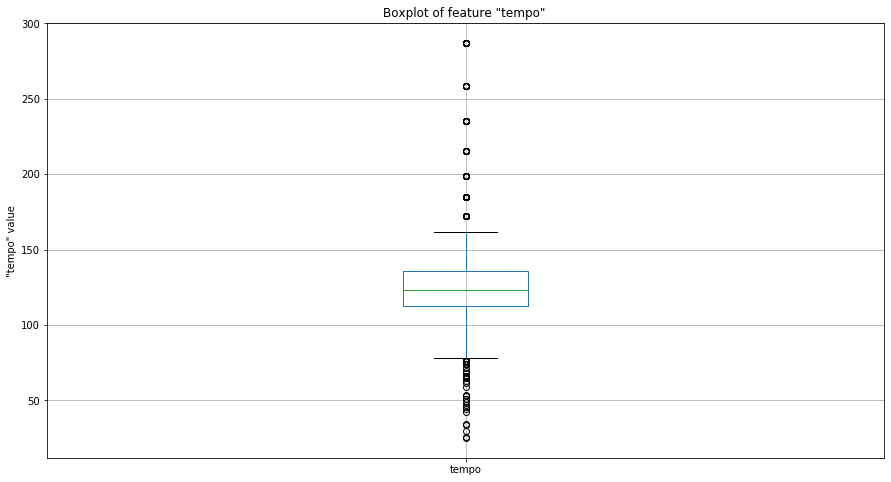

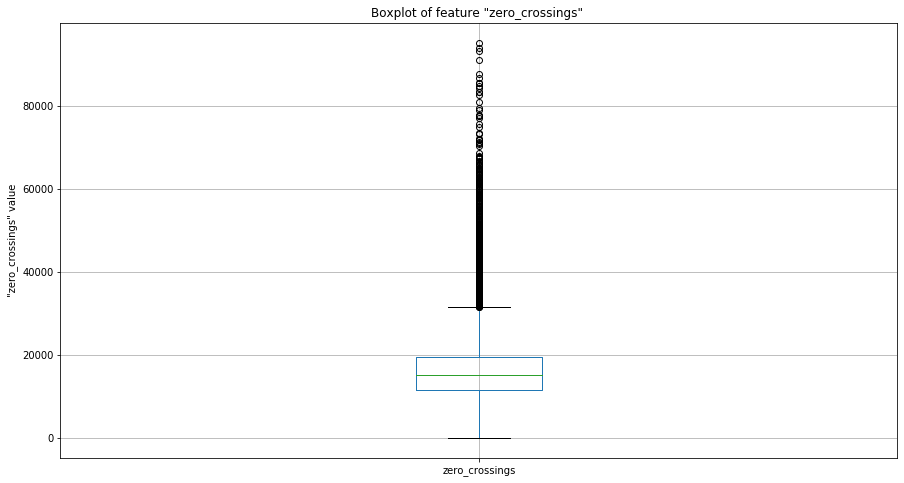

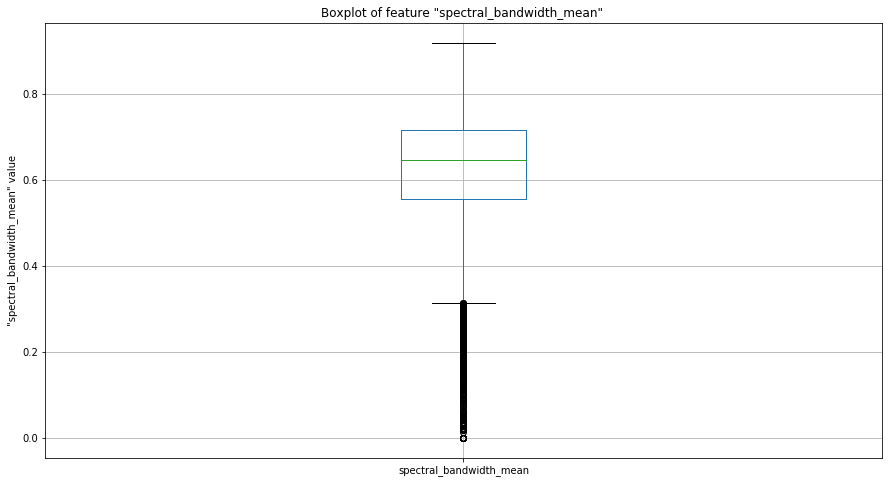

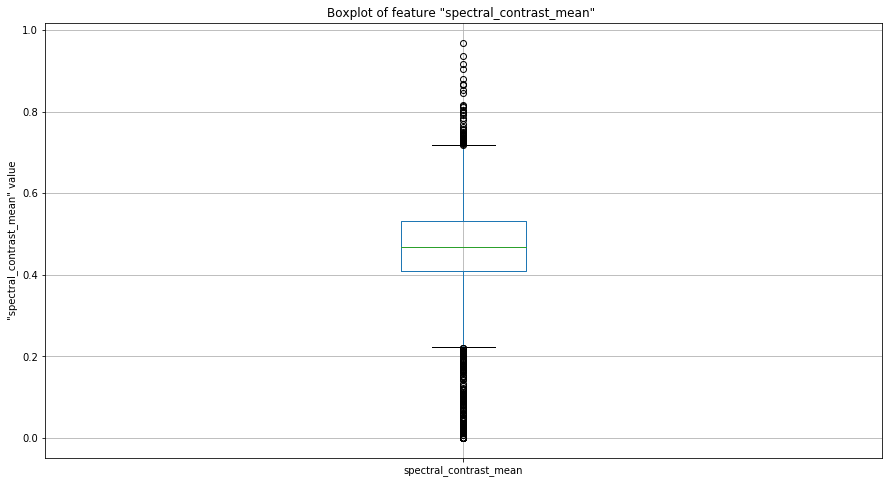

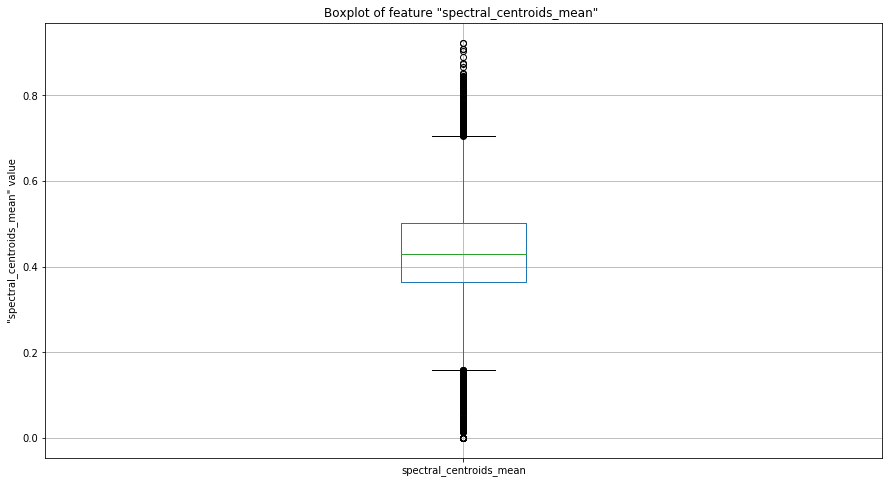

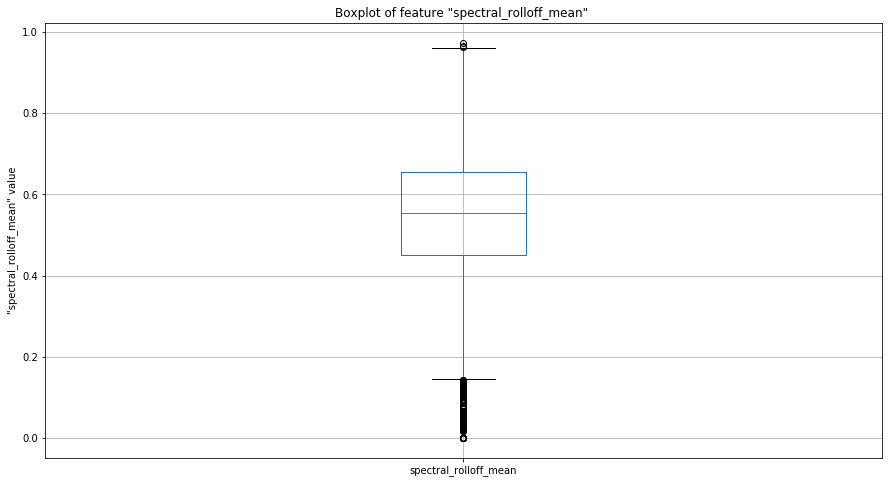

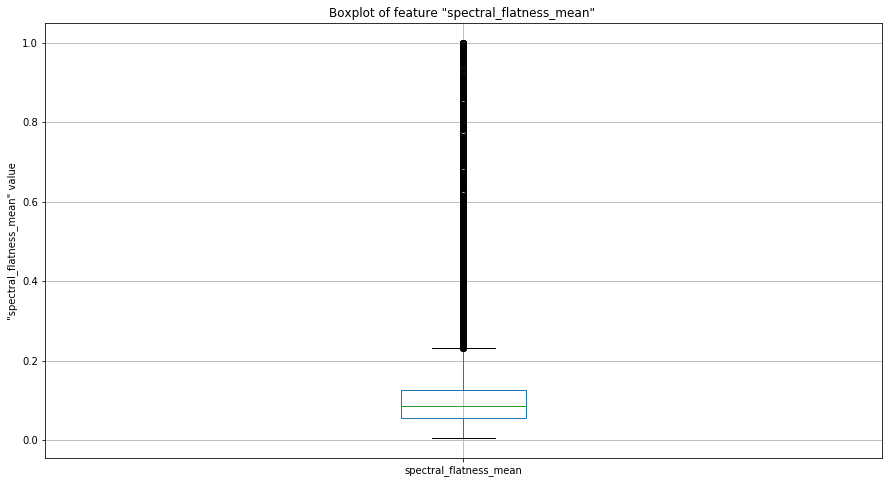

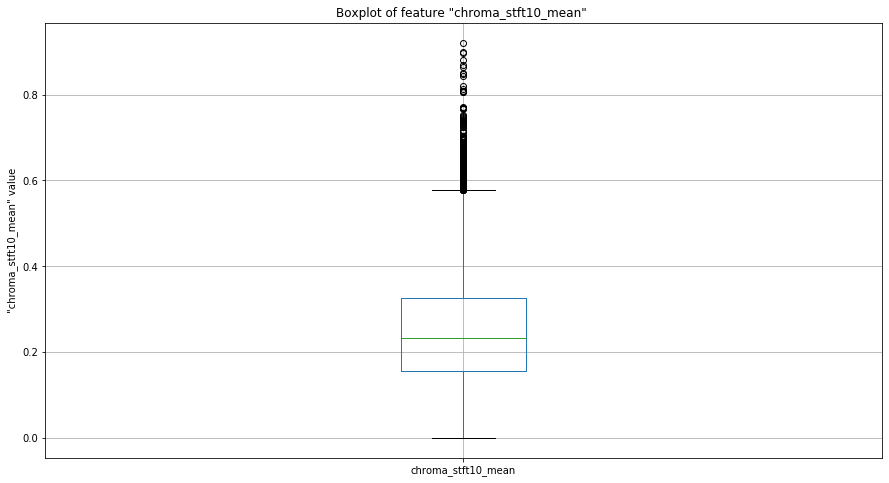

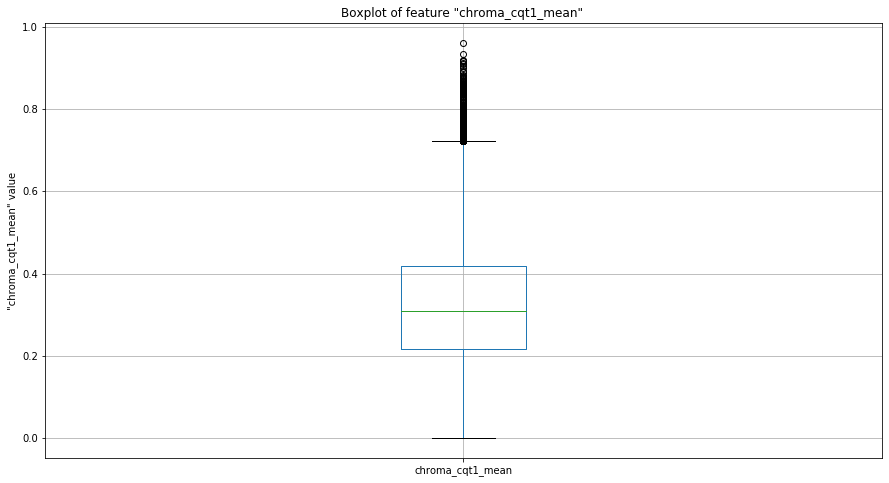

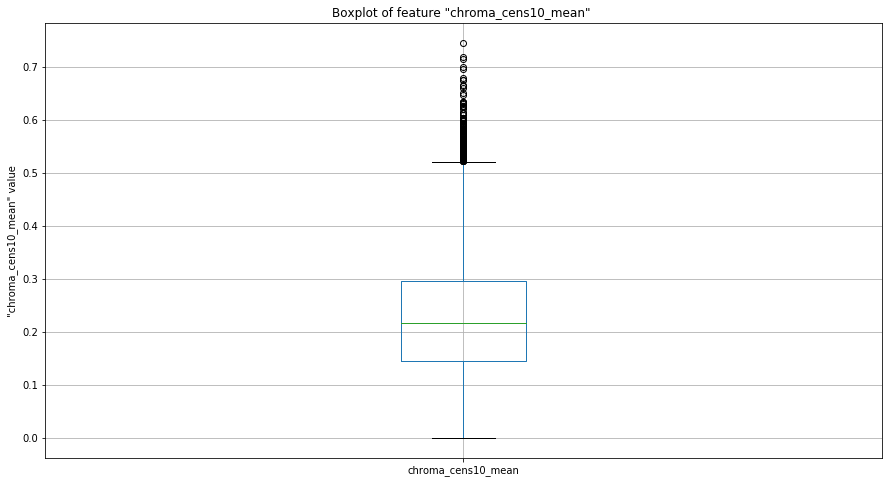

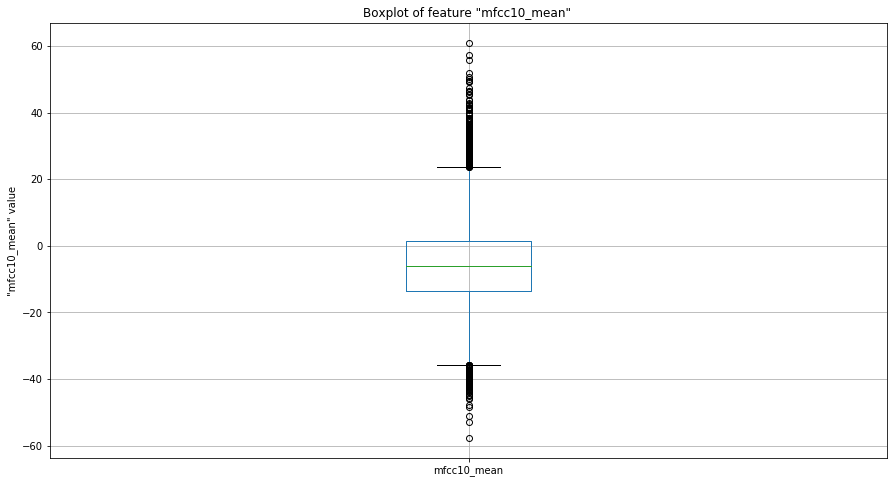

In [50]:
# Visualizing the box plot for the selected features

for i in ['tempo','zero_crossings','spectral_bandwidth_mean','spectral_contrast_mean','spectral_centroids_mean','spectral_rolloff_mean','spectral_flatness_mean','chroma_stft10_mean','chroma_cqt1_mean','chroma_cens10_mean','mfcc10_mean']:
    plt.figure(figsize=(15,8))
    artist_data.boxplot(column=i)
    plt.ylabel('"%s" value' % i)
    plt.title('Boxplot of feature "%s" ' %i)
    plt.show()

In [52]:
# Creating a copy of artist dataframe

df = artist_data.copy()
df.shape

(13116, 127)

In [53]:
# separating target variable from feature variables

df_features = df.drop(['song_id','target','language'], axis=1).copy()
df_target = df['target'].copy()

## Outlier detection

In [54]:
## Outlier detection  using IsolationForest technique

clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(df_features)
pred = clf.predict(df_features)
df_features['anomaly'] = pred
outliers=df_features.loc[df_features['anomaly']==-1]
outlier_index=list(outliers.index)

#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df_features['anomaly'].value_counts())

 1    11542
-1     1574
Name: anomaly, dtype: int64


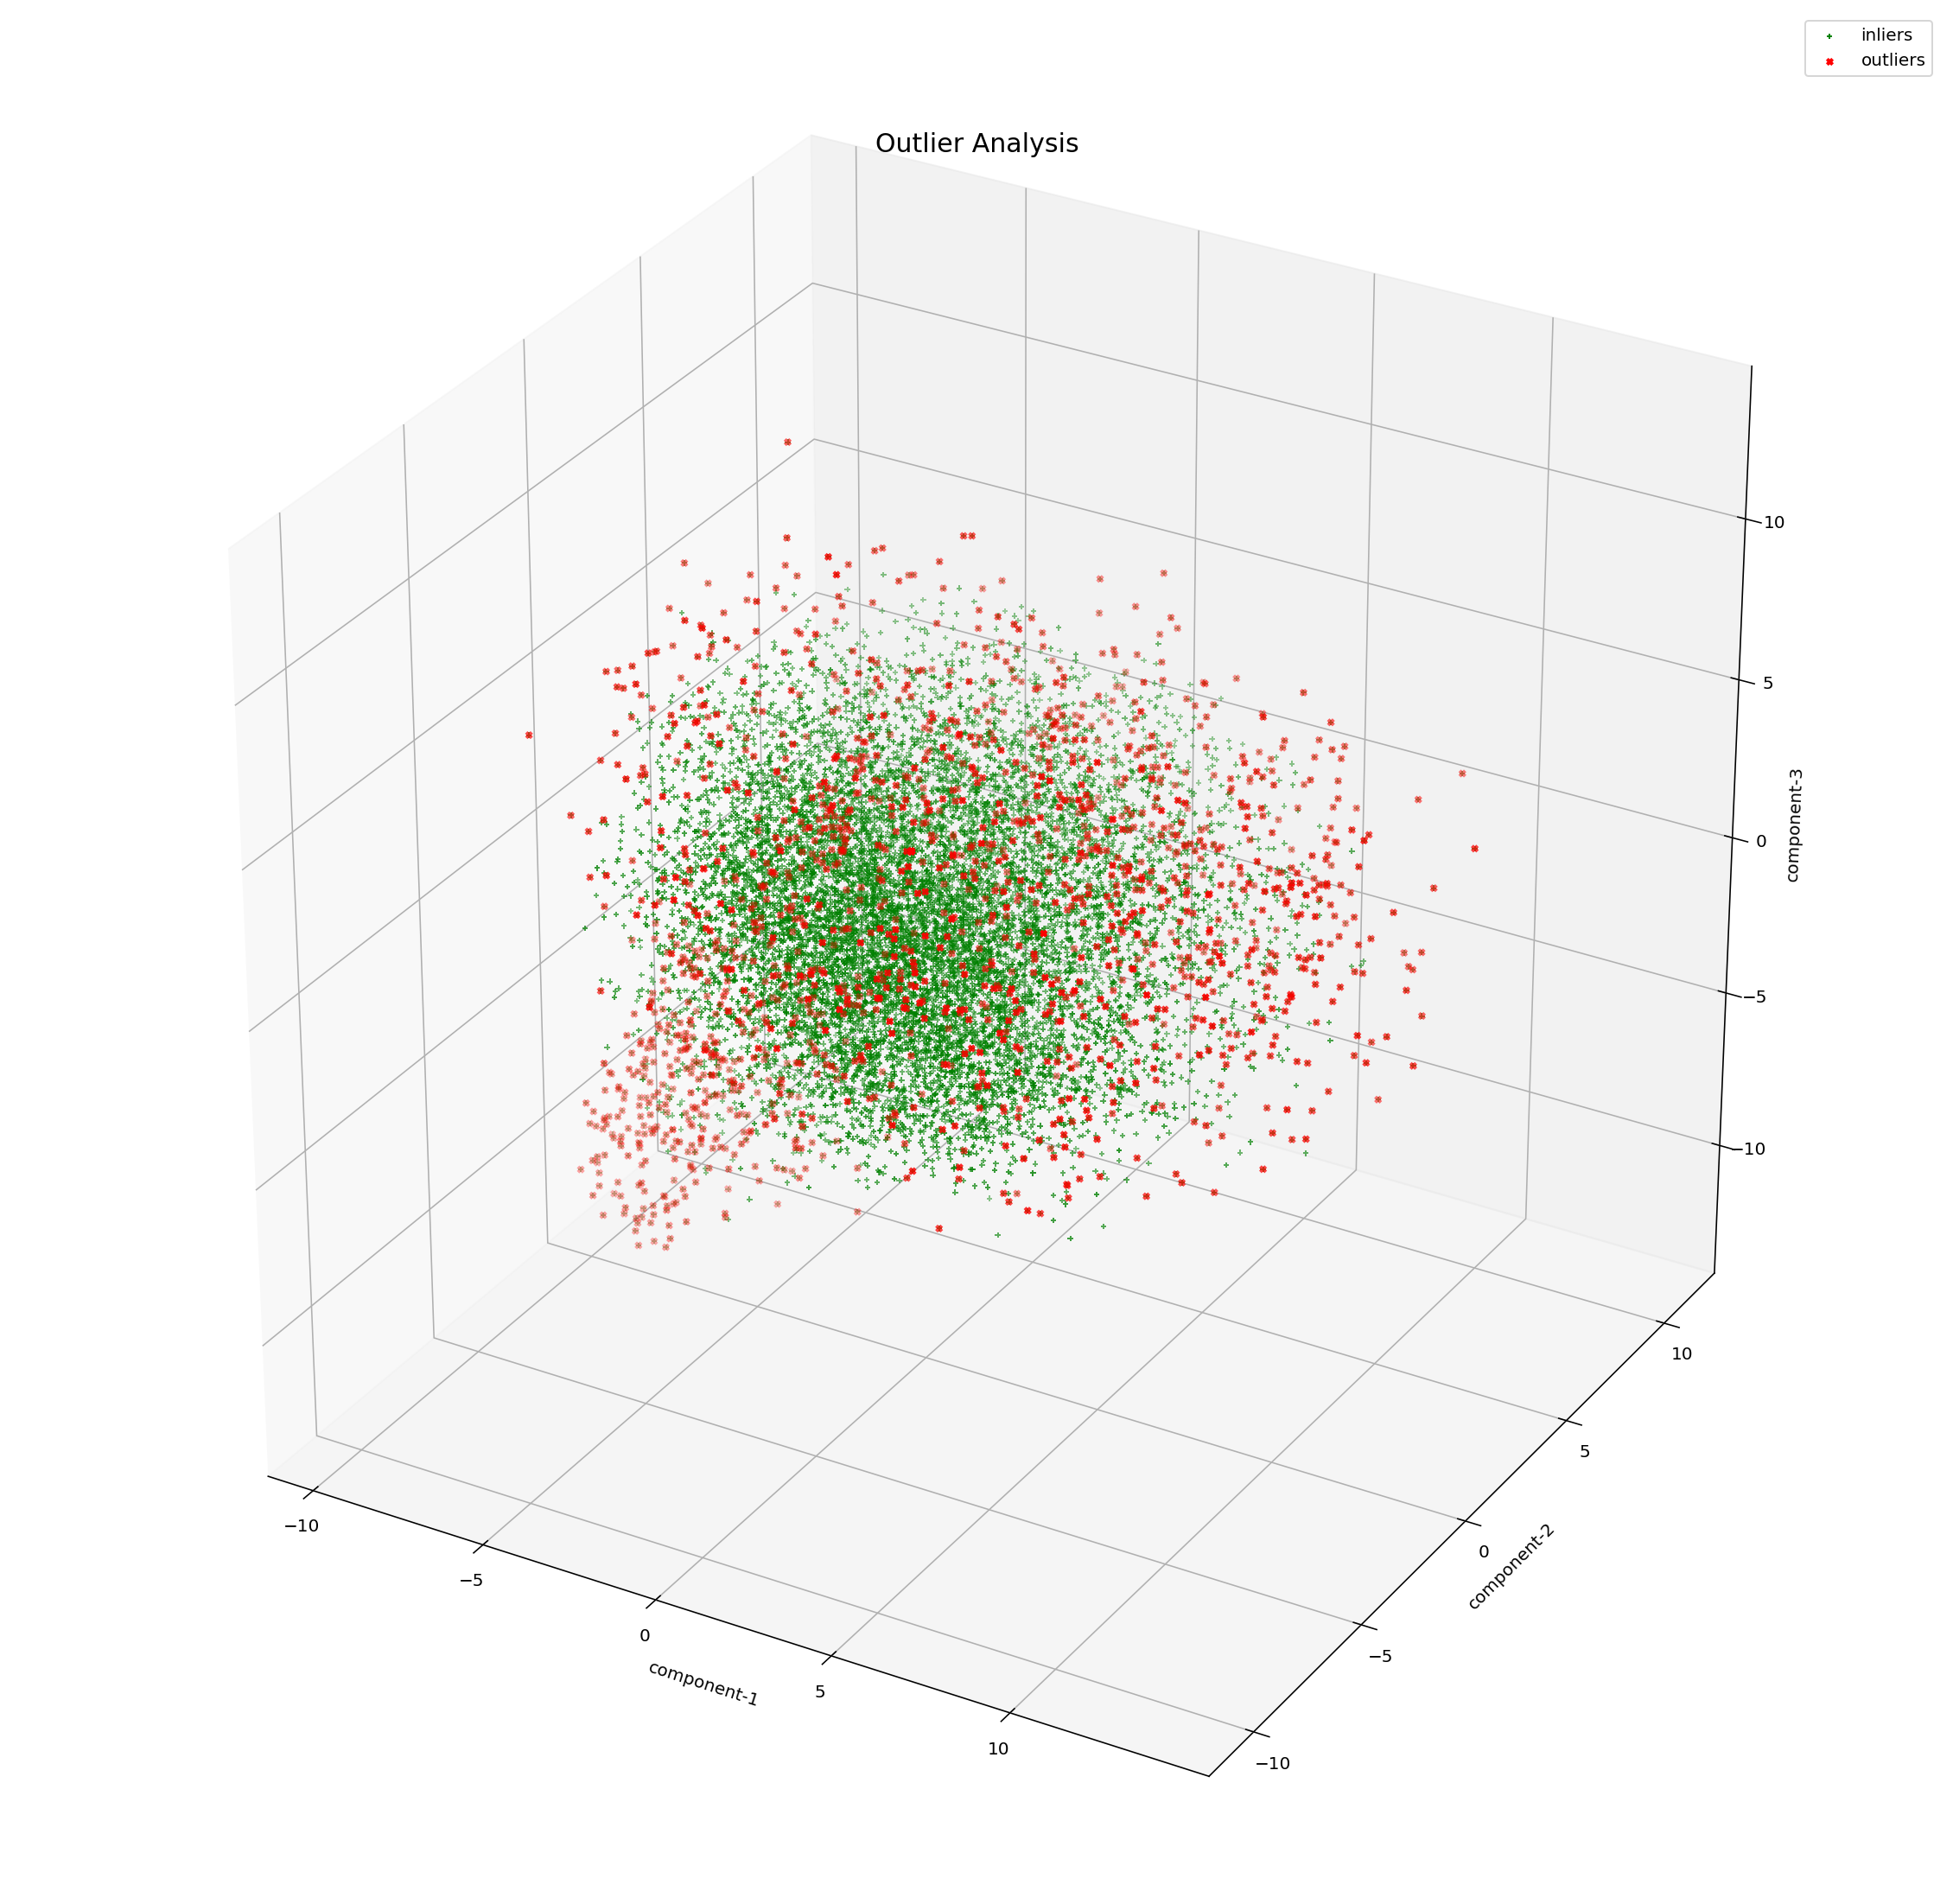

In [64]:
# Principle component analysis - 3D visualization

pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

#normalize the metrics

X = scaler.fit_transform(df_features)
X_reduce = pca.fit_transform(X)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("component-1")
ax.set_ylabel("component-2")
ax.set_zlabel("component-3")

# Plot the compressed data points

ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=10, lw=1, marker="+", label="inliers",c="green")

# Plot x's for the ground truth outliers

ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=10, marker="x", c="red", label="outliers")
ax.set_title('Outlier Analysis', size=15)
ax.legend()
plt.savefig('sample.jpg')

plt.show()

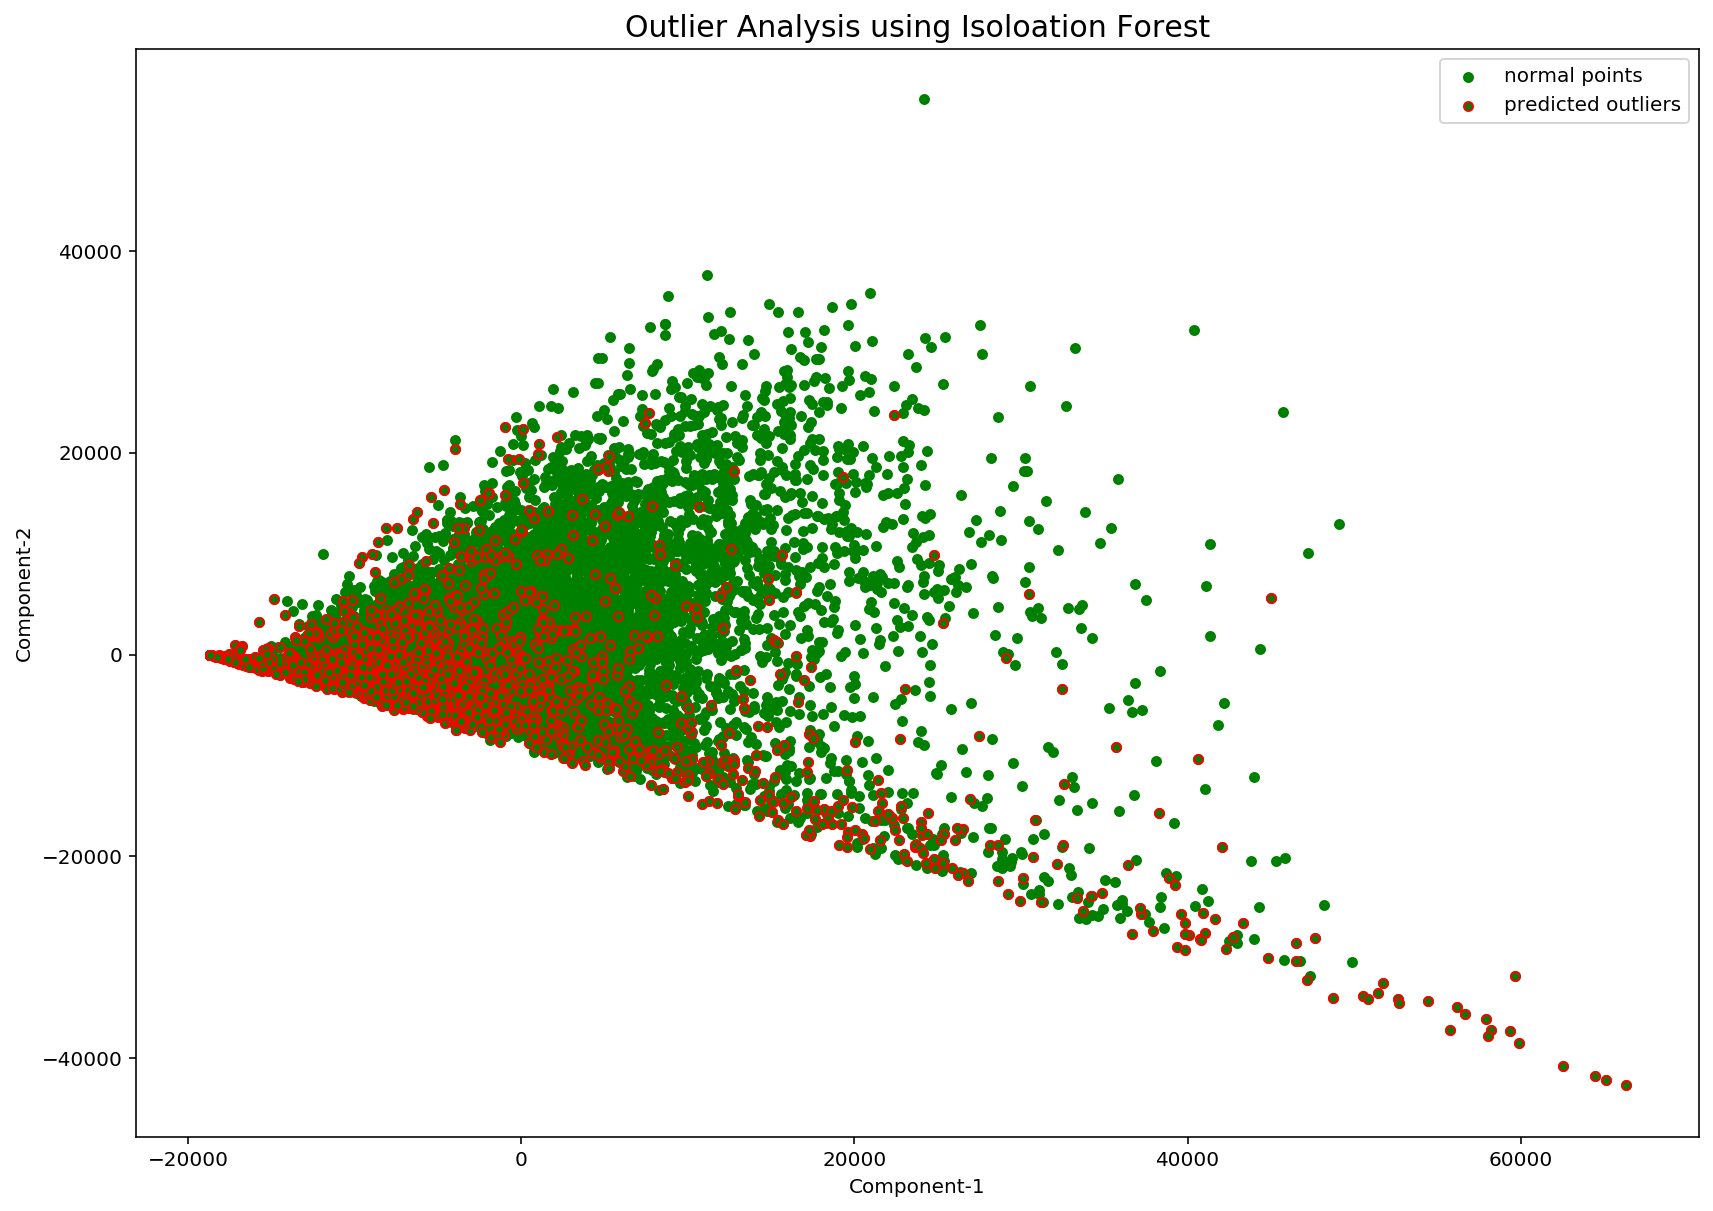

In [65]:
# Principle component analysis - 2D visualization

pca = PCA(2)
pca.fit(df_features)
res=pd.DataFrame(pca.transform(df_features))
Z = np.array(res)
plt.figure(figsize=(14,10))
plt.title("Outlier Analysis using Isoloation Forest", size = 15)
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.xlabel("Component-1")
plt.ylabel("Component-2")
plt.savefig('sample.jpg')
plt.show()

In [67]:
# Z-score technique to detect outliers present in the data

df_features = df.drop(['song_id','target','language'], axis=1).copy()
df_target = df['target'].copy()

z = np.abs(stats.zscore(df_features))
#print(z)
 
threshold = 5
#print(np.where(z > 5))
 
normal_df = df[(z < 5).all(axis=1)]
print(normal_df.shape)

outlier_df = df[~(z < 5).all(axis=1)]
outlier_df.shape


(11720, 127)


(1396, 127)

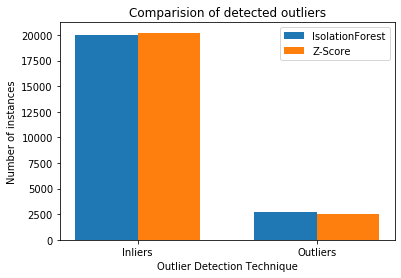

In [70]:
# Plotting and comparing the outliers count obtained by IsolationForest and Z-score techniques.

index = np.arange(2)
bar_width = 0.35

fig, ax = plt.subplots()
summer = ax.bar(index, [20042,2733], bar_width,
                label="IsolationForest")

winter = ax.bar(index+bar_width, [20222,2553],
                 bar_width, label="Z-Score")

ax.set_xlabel('Outlier Detection Technique')
ax.set_ylabel('Number of instances')
ax.set_title('Comparision of detected outliers')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Inliers", "Outliers"])
ax.legend()
plt.show()

### Correlation Analysis

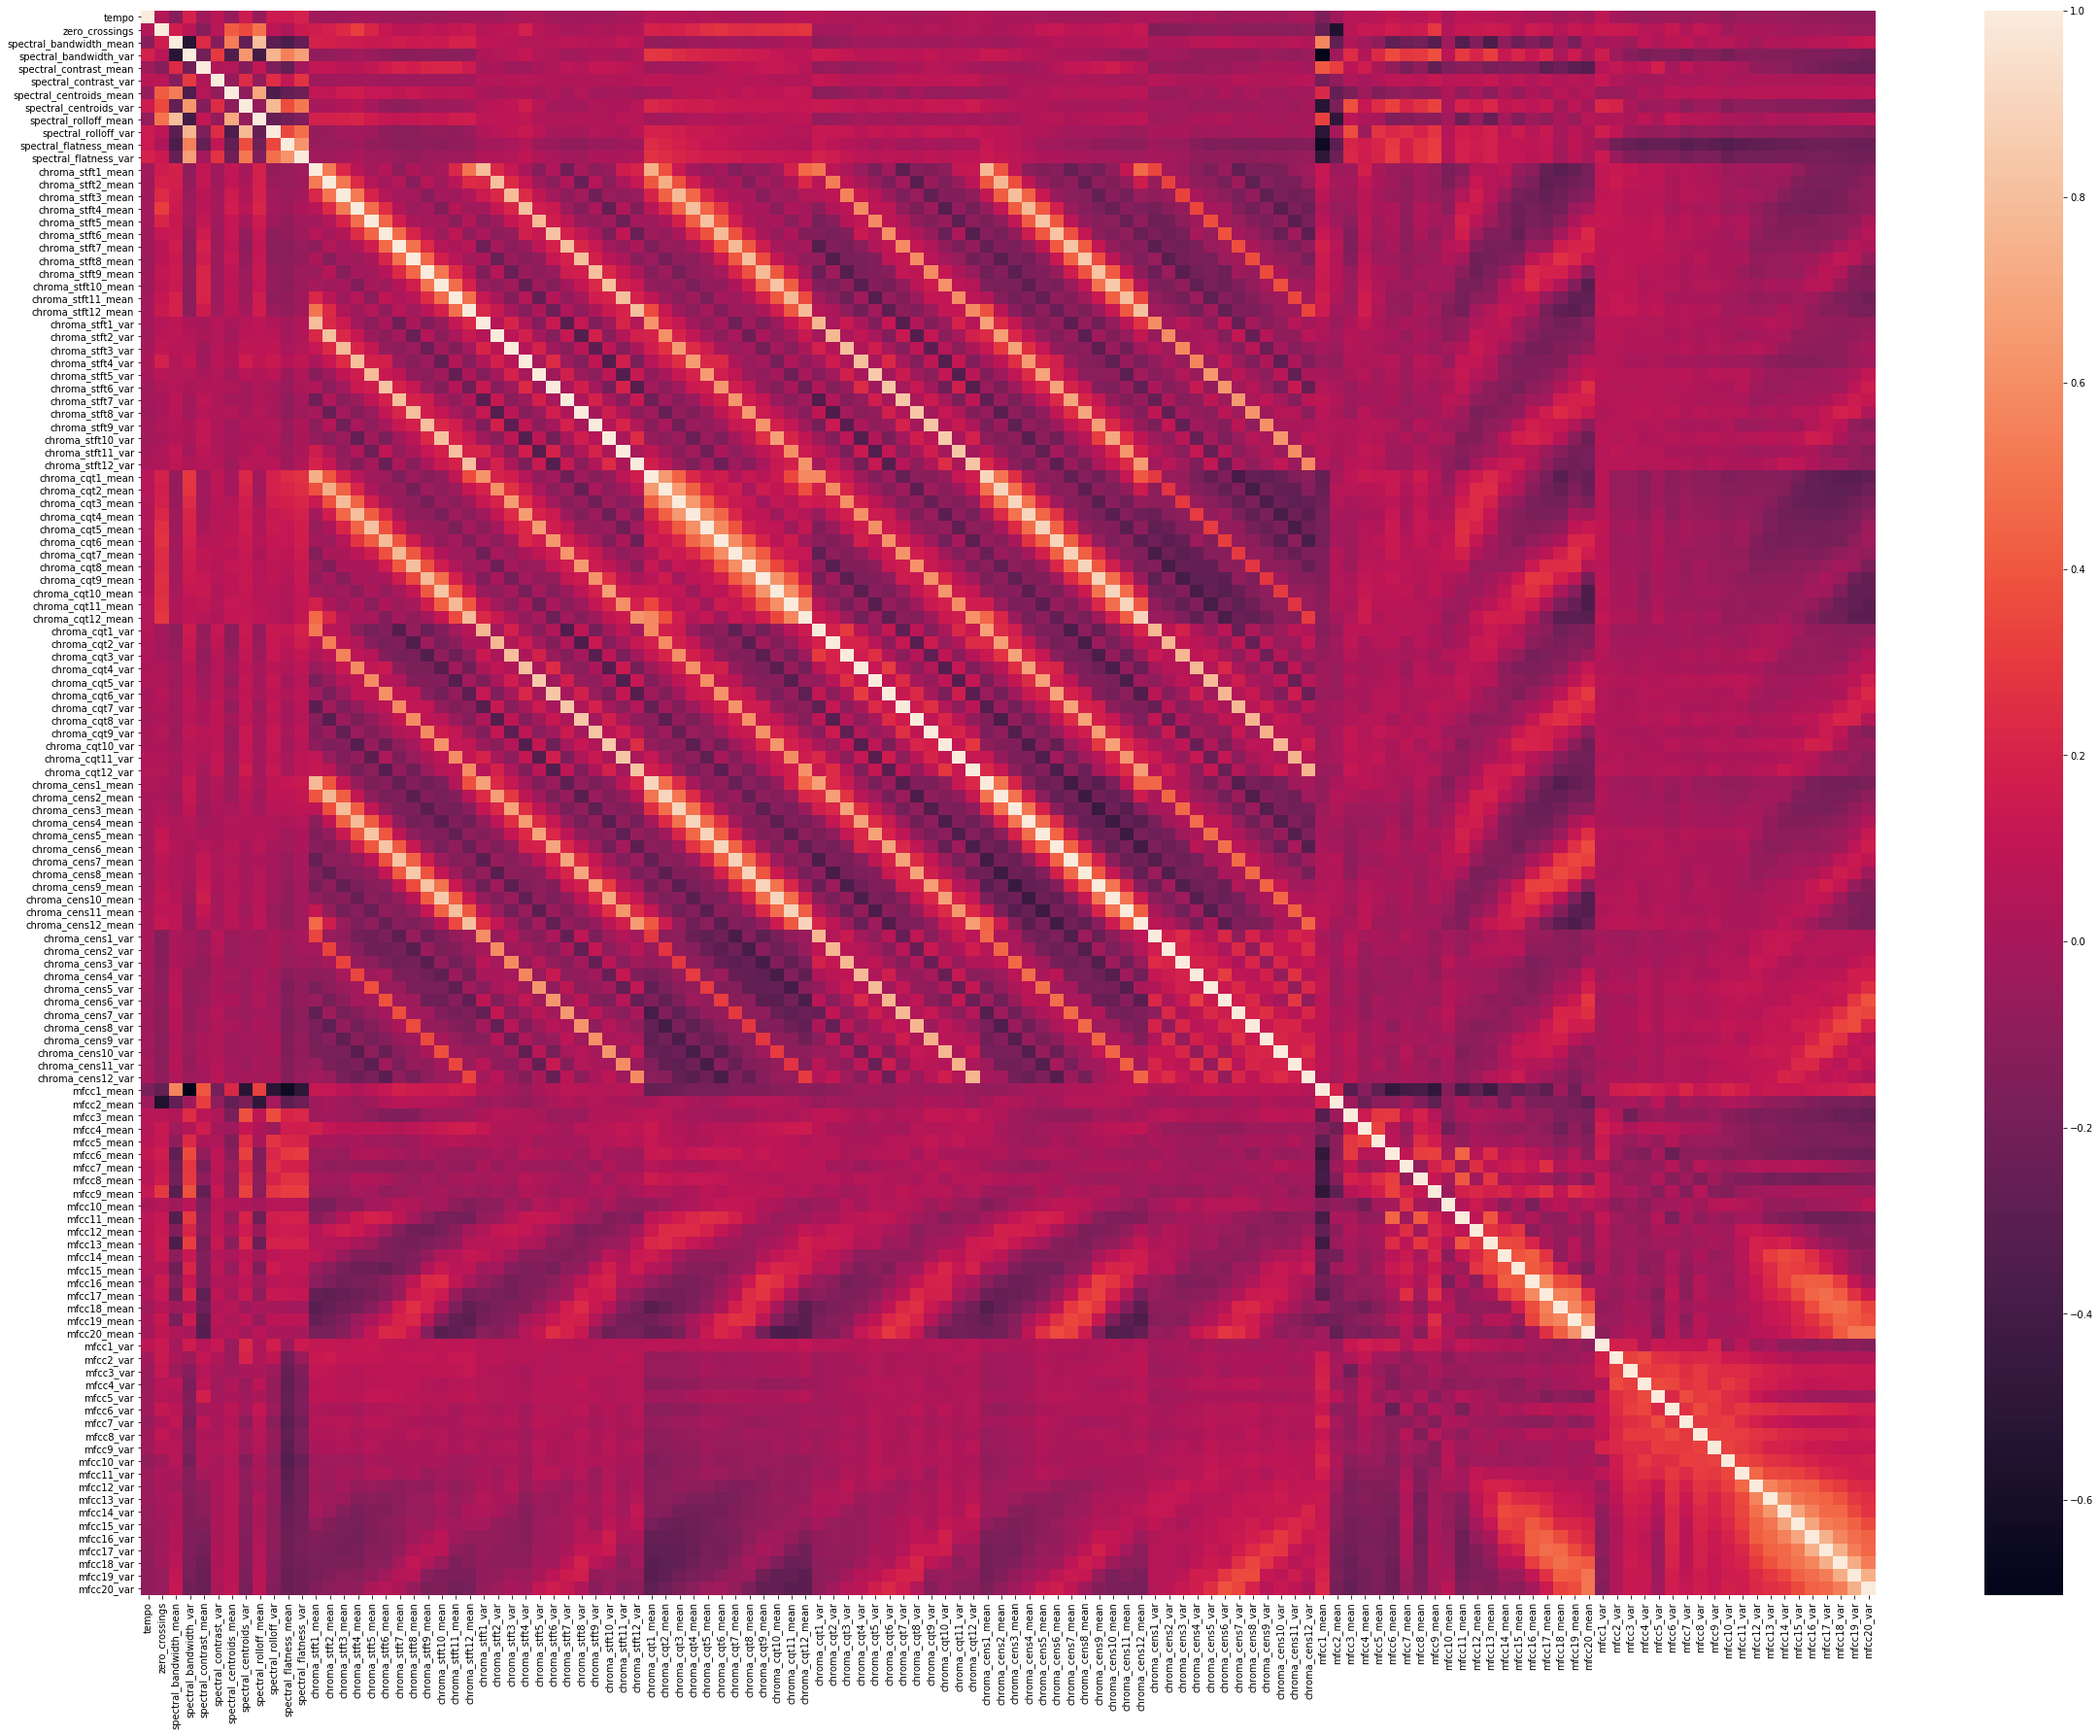

In [71]:
# Building the correlation matrix for all the attributes of the data using seaborn heatmap

corr = df.corr()

# plot the heatmap
plt.figure(figsize=(40,30))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.savefig('sample.jpg')
plt.show()

In [72]:
# Generating the Pearson Correlation values against every possible combination of the features

pearsoncorr = df.corr(method='pearson')
corr_df = pearsoncorr.stack().reset_index()
corr_df.columns = ['feature1','feature2','pearson_correlation']
corr_df.head(20)

feature1                 feature2  pearson_correlation
0     tempo                    tempo             1.000000
1     tempo           zero_crossings             0.048482
2     tempo  spectral_bandwidth_mean            -0.121469
3     tempo   spectral_bandwidth_var             0.192425
4     tempo   spectral_contrast_mean            -0.028374
5     tempo    spectral_contrast_var             0.076847
6     tempo  spectral_centroids_mean            -0.069350
7     tempo   spectral_centroids_var             0.153428
8     tempo    spectral_rolloff_mean            -0.074998
9     tempo     spectral_rolloff_var             0.143205
10    tempo   spectral_flatness_mean             0.144926
11    tempo    spectral_flatness_var             0.195001
12    tempo        chroma_stft1_mean            -0.022517
13    tempo        chroma_stft2_mean            -0.031745
14    tempo        chroma_stft3_mean            -0.024813
15    tempo        chroma_stft4_mean            -0.007372
16    tempo        chroma_stft5_mean            -0.004381
17    tempo        chroma_stft6_mean            -0.025181
18    tempo        chroma_stft7_mean            -0.028478
19    tempo        chroma_stft8_mean            -0.041047

In [73]:
# Eliminating all the correlations that were generated using a single variable

corr_df1 = corr_df[corr_df['feature1'] != corr_df['feature2']].copy()
corr_df1.reset_index()

index                 feature1                 feature2  \
0          1                    tempo           zero_crossings   
1          2                    tempo  spectral_bandwidth_mean   
2          3                    tempo   spectral_bandwidth_var   
3          4                    tempo   spectral_contrast_mean   
4          5                    tempo    spectral_contrast_var   
5          6                    tempo  spectral_centroids_mean   
6          7                    tempo   spectral_centroids_var   
7          8                    tempo    spectral_rolloff_mean   
8          9                    tempo     spectral_rolloff_var   
9         10                    tempo   spectral_flatness_mean   
10        11                    tempo    spectral_flatness_var   
11        12                    tempo        chroma_stft1_mean   
12        13                    tempo        chroma_stft2_mean   
13        14                    tempo        chroma_stft3_mean   
14        15                    tempo        chroma_stft4_mean   
15        16                    tempo        chroma_stft5_mean   
16        17                    tempo        chroma_stft6_mean   
17        18                    tempo        chroma_stft7_mean   
18        19                    tempo        chroma_stft8_mean   
19        20                    tempo        chroma_stft9_mean   
20        21                    tempo       chroma_stft10_mean   
21        22                    tempo       chroma_stft11_mean   
22        23                    tempo       chroma_stft12_mean   
23        24                    tempo         chroma_stft1_var   
24        25                    tempo         chroma_stft2_var   
25        26                    tempo         chroma_stft3_var   
26        27                    tempo         chroma_stft4_var   
27        28                    tempo         chroma_stft5_var   
28        29                    tempo         chroma_stft6_var   
29        30                    tempo         chroma_stft7_var   
30        31                    tempo         chroma_stft8_var   
31        32                    tempo         chroma_stft9_var   
32        33                    tempo        chroma_stft10_var   
33        34                    tempo        chroma_stft11_var   
34        35                    tempo        chroma_stft12_var   
35        36                    tempo         chroma_cqt1_mean   
36        37                    tempo         chroma_cqt2_mean   
37        38                    tempo         chroma_cqt3_mean   
38        39                    tempo         chroma_cqt4_mean   
39        40                    tempo         chroma_cqt5_mean   
40        41                    tempo         chroma_cqt6_mean   
41        42                    tempo         chroma_cqt7_mean   
42        43                    tempo         chroma_cqt8_mean   
43        44                    tempo         chroma_cqt9_mean   
44        45                    tempo        chroma_cqt10_mean   
45        46                    tempo        chroma_cqt11_mean   
46        47                    tempo        chroma_cqt12_mean   
47        48                    tempo          chroma_cqt1_var   
48        49                    tempo          chroma_cqt2_var   
49        50                    tempo          chroma_cqt3_var   
50        51                    tempo          chroma_cqt4_var   
51        52                    tempo          chroma_cqt5_var   
52        53                    tempo          chroma_cqt6_var   
53        54                    tempo          chroma_cqt7_var   
54        55                    tempo          chroma_cqt8_var   
55        56                    tempo          chroma_cqt9_var   
56        57                    tempo         chroma_cqt10_var   
57        58                    tempo         chroma_cqt11_var   
58        59                    tempo         chroma_cqt12_var   
59        60                    tempo        ch

In [75]:
# Displaying the top 40 instances of the positively correlated variables

corr_df1.sort_values(by=['pearson_correlation'], ascending=False).head(40)

feature1            feature2  pearson_correlation
8601  chroma_cens10_mean   chroma_cqt10_mean             0.906070
5649   chroma_cqt10_mean  chroma_cens10_mean             0.906070
7726   chroma_cens3_mean    chroma_cqt3_mean             0.903652
4774    chroma_cqt3_mean   chroma_cens3_mean             0.903652
4649    chroma_cqt2_mean   chroma_cens2_mean             0.903172
7601   chroma_cens2_mean    chroma_cqt2_mean             0.903172
4899    chroma_cqt4_mean   chroma_cens4_mean             0.902206
7851   chroma_cens4_mean    chroma_cqt4_mean             0.902206
7476   chroma_cens1_mean    chroma_cqt1_mean             0.901961
4524    chroma_cqt1_mean   chroma_cens1_mean             0.901961
8101   chroma_cens6_mean    chroma_cqt6_mean             0.900300
5149    chroma_cqt6_mean   chroma_cens6_mean             0.900300
7976   chroma_cens5_mean    chroma_cqt5_mean             0.898404
5024    chroma_cqt5_mean   chroma_cens5_mean             0.898404
8851  chroma_cens12_mean   chroma_cqt12_mean             0.897278
5899   chroma_cqt12_mean  chroma_cens12_mean             0.897278
8476   chroma_cens9_mean    chroma_cqt9_mean             0.896928
5524    chroma_cqt9_mean   chroma_cens9_mean             0.896928
8351   chroma_cens8_mean    chroma_cqt8_mean             0.895791
5399    chroma_cqt8_mean   chroma_cens8_mean             0.895791
8726  chroma_cens11_mean   chroma_cqt11_mean             0.893728
5774   chroma_cqt11_mean  chroma_cens11_mean             0.893728
5274    chroma_cqt7_mean   chroma_cens7_mean             0.889557
8226   chroma_cens7_mean    chroma_cqt7_mean             0.889557
2673  chroma_stft10_mean  chroma_cens10_mean             0.851707
8577  chroma_cens10_mean  chroma_stft10_mean             0.851707
4149   chroma_stft10_var    chroma_cqt10_var             0.850462
7101    chroma_cqt10_var   chroma_stft10_var             0.850462
2423   chroma_stft8_mean   chroma_cens8_mean             0.849932
8327   chroma_cens8_mean   chroma_stft8_mean             0.849932
3524    chroma_stft5_var     chroma_cqt5_var             0.844262
6476     chroma_cqt5_var    chroma_stft5_var             0.844262
3899    chroma_stft8_var     chroma_cqt8_var             0.838782
6851     chroma_cqt8_var    chroma_stft8_var             0.838782
4274   chroma_stft11_var    chroma_cqt11_var             0.830475
7226    chroma_cqt11_var   chroma_stft11_var             0.830475
6601     chroma_cqt6_var    chroma_stft6_var             0.828298
3649    chroma_stft6_var     chroma_cqt6_var             0.828298
3774    chroma_stft7_var     chroma_cqt7_var             0.827440
6726     chroma_cqt7_var    chroma_stft7_var             0.827440

In [76]:
# Displaying the top 20 instances of the negatively correlated variables

corr_df1.sort_values(by=['pearson_correlation'], ascending=True).head(20)

feature1                 feature2  pearson_correlation
10419               mfcc1_mean   spectral_bandwidth_var            -0.702014
456     spectral_bandwidth_var               mfcc1_mean            -0.702014
10426               mfcc1_mean   spectral_flatness_mean            -0.635926
1324    spectral_flatness_mean               mfcc1_mean            -0.635926
209             zero_crossings               mfcc2_mean            -0.562333
10541               mfcc2_mean           zero_crossings            -0.562333
952     spectral_centroids_var               mfcc1_mean            -0.521319
10423               mfcc1_mean   spectral_centroids_var            -0.521319
374     spectral_bandwidth_var  spectral_bandwidth_mean            -0.516981
251    spectral_bandwidth_mean   spectral_bandwidth_var            -0.516981
10425               mfcc1_mean     spectral_rolloff_var            -0.504901
1200      spectral_rolloff_var               mfcc1_mean            -0.504901
1448     spectral_flatness_var               mfcc1_mean            -0.489402
10427               mfcc1_mean    spectral_flatness_var            -0.489402
10508               mfcc1_mean               mfcc9_mean            -0.484937
11492               mfcc9_mean               mfcc1_mean            -0.484937
1077     spectral_rolloff_mean               mfcc2_mean            -0.484189
10548               mfcc2_mean    spectral_rolloff_mean            -0.484189
11120               mfcc6_mean               mfcc1_mean            -0.472769
10505               mfcc1_mean               mfcc6_mean            -0.472769

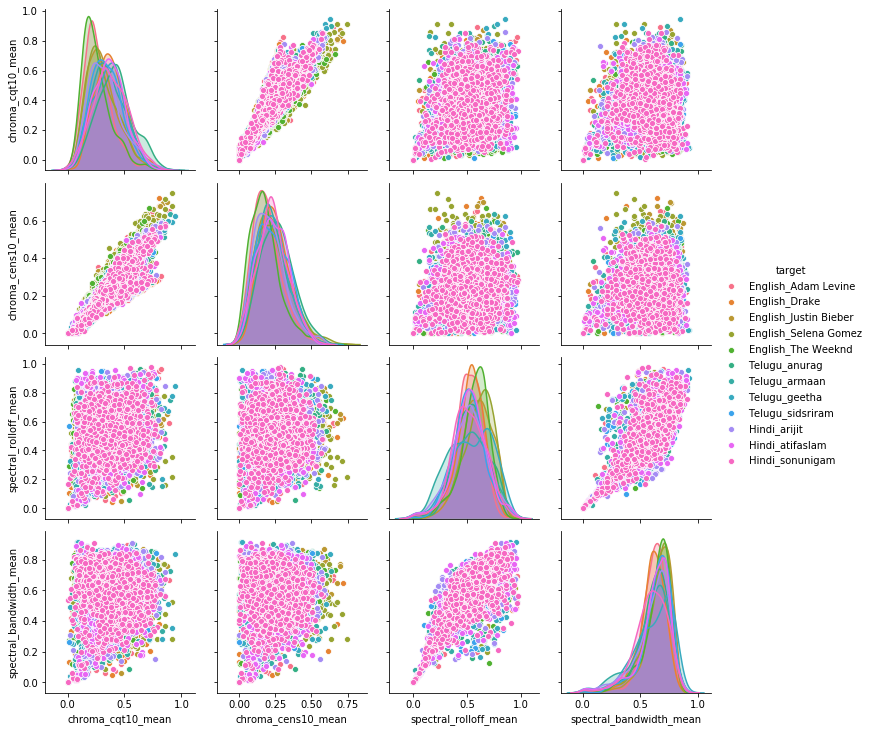

In [77]:
# Pairwise plotting to visualize the correlation amongst the top positively correlated variables

sns.pairplot(df[['chroma_cqt10_mean', 'chroma_cens10_mean', 'spectral_rolloff_mean', 'spectral_bandwidth_mean', 'target']], hue='target')
plt.show()

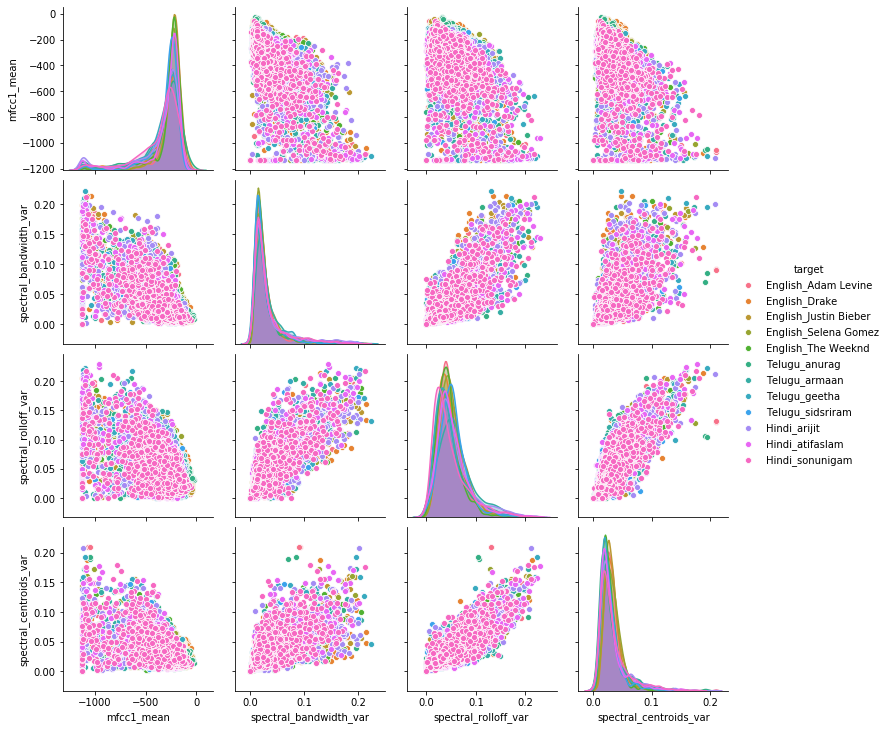

In [78]:
# Pairwise plotting to visualize the correlation amongst the top negatively correlated variables

sns.pairplot(df[['mfcc1_mean', 'spectral_bandwidth_var', 'spectral_rolloff_var', 'spectral_centroids_var', 'target']], hue='target')
plt.show()

## PCA:

In [79]:
# separating target variable from feature variables

df_features = df.drop(['song_id','target','language'], axis=1).copy()
df_target = df['target'].copy()

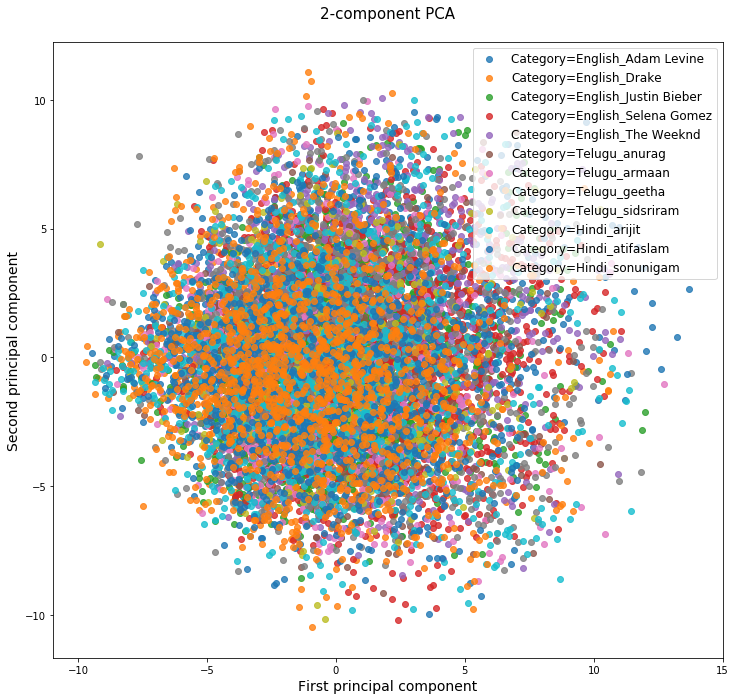

In [80]:
# pipelining and transforming the feature data to reduce the dimentionality

pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=2))
pca_transformed = pca_pipeline.fit_transform(df_features)

# visualize the features variable data using PCA(n_component = 2) using quality variable to label the data.

target = list(df_target.unique())
#marker = ['o','+','<','^','*']
plt.figure(figsize = (12,12))
for i in range(len(target)):  
    plt.scatter(pca_transformed[df.target==target[i], 0], pca_transformed[df.target==target[i], 1], 
                #marker = marker[i], 
                alpha=.8, label = 'Category=%s'%target[i])

plt.gca().set_aspect("equal")
plt.xlabel("First principal component", fontsize = 14)
plt.ylabel("Second principal component", fontsize = 14)
plt.legend(loc='best', fontsize = 12)
plt.title('2-component PCA\n', fontsize = 15)
plt.show()

<Figure size 432x288 with 0 Axes>

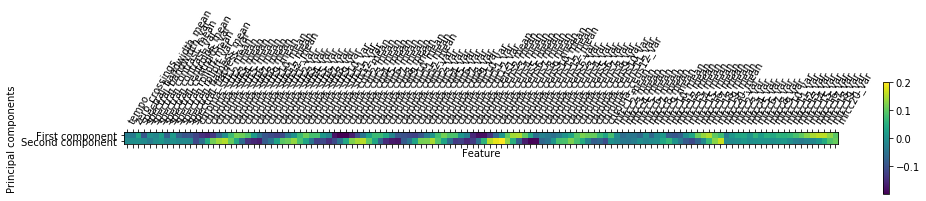

In [81]:
# Visualising data variance of all the feature attributes with respect to 1st and 2nd principal components 

components = pca_pipeline.named_steps['pca'].components_
plt.figure()
plt.matshow(components, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(df_features.columns)),
           df_features.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

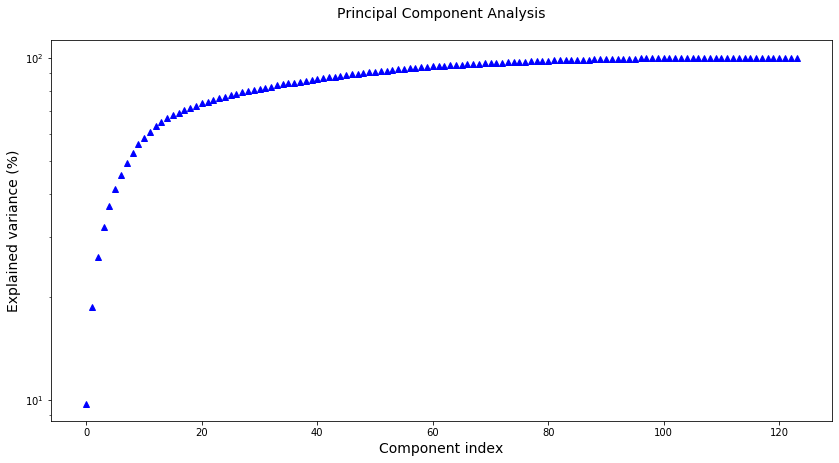

In [82]:
# Explained variance for the n components

pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(df_features)
pca = pca_scaled.named_steps['pca']
plt.figure(figsize=(14,7))
plt.semilogy(np.cumsum(pca.explained_variance_ratio_*100), 'b^')
plt.xlabel("Component index", fontsize = 14)
plt.ylabel("Explained variance (%)", fontsize = 14)
plt.title("Principal Component Analysis\n", fontsize= 14)
plt.show()

In [83]:
# pipelining and transforming the feature data to reduce the dimentionality

pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=80))
pca_transformed = pca_pipeline.fit_transform(df_features)

In [84]:
# Building the dataframe on 80 components obtained from PCA

pca_df = pd.DataFrame(data = pca_transformed)
finalDf = pd.concat([pca_df, df_target], axis = 1)
finalDf.shape

(13116, 81)

In [85]:
# Displaying first five instances of the data

finalDf.head()

0         1         2          3         4         5         6  \
0 -1.827335 -2.256777 -0.903751  10.301044  0.620099  0.620632  0.489641   
1  2.025989  0.441281  0.376539  -0.586625 -2.036355 -2.439479 -1.803635   
2  2.723809  3.563807  1.228067  -1.172875 -0.745987 -0.958132 -1.188426   
3  2.951669  1.958432  1.961544  -1.076994 -1.543390 -1.703135 -0.834766   
4  1.645428  3.213587  4.240718  -1.249053 -1.555400 -1.367242 -0.503761   

          7         8         9        10        11        12        13  \
0  1.888207  3.693750 -3.621383 -0.357208 -1.871297  0.077685  0.449132   
1  0.035705  3.298495 -2.308301 -1.126542  1.583431  2.030267  0.231077   
2  1.460021  4.545623 -0.383365 -1.415209  0.646339  0.018941 -0.660892   
3  2.845731  3.249200 -0.267589 -2.764364 -1.125577  2.921521 -0.851448   
4  3.057599  3.328564 -0.023846 -2.305385  0.009950  1.157601 -0.340458   

         14        15        16        17        18        19        20  \
0  0.765414  2.056808 -0.319018 -1.604116  0.945637  0.624242  0.972702   
1 -1.162696 -0.408390  1.462409  0.099947 -0.828530 -0.739860 -1.111369   
2 -2.421361 -0.690311  1.529563  1.316934 -0.262147 -0.676860 -0.563759   
3 -2.088195 -1.109958  1.467684  0.774261 -0.821432 -1.133107 -0.063148   
4 -1.790583 -1.087413  1.260659  0.669205 -0.742331 -0.672712 -1.405972   

         21        22        23        24        25        26        27  \
0 -1.102288  7.126719 -2.961755  1.732200  3.717574 -2.105321 -1.681183   
1 -0.954702  0.914409  0.626064  1.165498  0.336147  0.517371 -0.027065   
2 -0.262186 -0.421149 -0.524218 -0.186722  1.452044 -0.395297 -0.394010   
3 -0.001621 -0.161688  0.116531  1.169350  1.644500  0.496681  0.028401   
4  0.042988 -0.464633 -0.329679  1.077068  1.653136 -0.500992 -0.433797   

         28        29        30        31        32        33        34  \
0 -0.099486  0.344180  2.306495  2.395349 -0.978705  2.329755  0.873268   
1 -0.775592 -0.224242  0.629092  0.338422 -0.135912  0.163297 -1.259808   
2 -0.016172 -0.227842  0.540971 -0.051322 -0.140542 -0.586191 -0.883564   
3 -0.415380 -0.241990  1.213134 -0.198831 -0.125068 -0.191459 -1.713718   
4 -0.257471  1.532430  1.261530 -0.055363 -0.395620  0.395420 -0.656505   

         35        36        37        38        39        40        41  \
0  1.100153 -0.501931  0.505341 -0.819331 -0.625054  0.480984  0.446798   
1  0.058353 -0.032149 -0.375027  0.268731  1.465585  0.729328 -1.551165   
2 -0.343445 -0.045869  1.062740  0.582460  0.289209  1.440352 -0.889830   
3 -0.575894  0.491536 -0.326875  0.291096  0.141172  1.179992  0.223814   
4 -0.955275  1.137306 -0.733382 -0.210849  0.372917  0.861610 -0.498835   

         42        43        44        45        46        47        48  \
0  0.117145 -0.581606  0.001891 -0.204353 -0.418749  0.438474 -0.685426   
1  0.253038  1.107349  0.779194 -0.623870 -1.003812  0.081557  0.759863   
2  1.060608  0.004773  1.023976 -0.043635 -0.445307  0.059880 -0.341718   
3  0.654242 -0.296164  0.733730  0.819730 -0.267224  0.035517 -0.448356   
4  1.189946  0.239540  2.540206 -0.706999 -0.530214  0.183176 -0.637596   

         49        50        51        52        53        54        55  \
0  1.232188 -0.472051 -0.131655 -0.585203 -0.443148 -0.534292 -1.229396   
1  0.286219 -0.200400  0.241904  0.657593 -0.334588 -0.356213  0.533005   
2 -0.216618  0.250137 -0.428706  0.543613 -0.641727 -0.028905  0.369114   
3 -0.837499  0.758417  0.107380  1.088254 -0.165433  0.992133  1.098324   
4 -0.297894  0.542308 -0.092226  1.147618 -0.286510  0.111903  1.323483   

         56        57        58        59        60        61        62  \
0  0.012422 -0.518491  0.359653  1.089824  0.373663  0.009151 -0.012686   
1 -0.701838  0.733847 -0.611491  0.810254  0.353239  0.713131  0.972215   
2  0.336783  0.194130 -0.258579  0.250723 -0.156957 -0.241024  0.678723   
3 -0.346491  0.499983 -0.015363  0.359111 -0.493876 -0.953798  0.261946   
4 -0.705183 -0.020247